# Loan Prediction Based on Customer Behavior Projects

Anggota Kelompok 3 (**Dackers**)

1. Muhammad Cikal Merdeka
2. Maulana Rifan Haditama
3. Maulana Ibrahim
4. Maria Meidiana Siahaan
5. Revita Rahmadini
6. Nugraha Eddy Wijayanto
7. Mochamad Ali Mustofa

# STAGE 0

## Problem Statement

Sebuah perusahaan pemberi pinjaman perlu melakukan verifikasi terhadap pengajuan pinjaman dari calon-calon peminjamnya (customer), perusahaan ini memiliki data-data peminjam terdahulu berikut dengan kelayakannya (kemampuan melunasi atau tidak). Perusahaan ini ingin memiliki sistem yang dapat memprediksi kelayakan untuk calon-calon peminjam di masa yang akan datang berdasarkan data-data peminjam terdahulu untuk mengurangi resiko gagal bayar.

## Role
Sebagai Data Scientist, kami memiliki peran dalam melakukan analisis dan perancangan model untuk mendapatkan insight yang berdampak bagi perkembangan bisnis

## Goals

* Peningkatan efisiensi : Meningkatkan proses penilaian risiko kredit agar lebih efisien dan tidak memakan waktu yang berlebihan.
* Peningkatan ketepatan dalam penilaian risiko kredit: Memperbaiki tingkat ketepatan dalam menilai risiko kredit dengan menggunakan model machine learning.

## Objectives

Sasaran akhir dari proyek ini adalah menciptakan model machine learning yang dapat:

* Memprediksi risiko kredit dengan tingkat recall yang tinggi. Tujuan mengurangi risiko kerugian akibat penilaian risiko yang kurang tepat.
* Menilai sejumlah besar variabel dan fitur yang berperan penting untuk menghasilkan prediksi yang komprehensif.
* Memberikan keputusan penilaian risiko secara otomatis dalam waktu yang singkat.

## Business Metrics

* Default rate (%) : Persentase jumlah calon nasabah yang gagal membayar pinjaman (default) dibagi dengan jumlah total nasabah.

# STAGE 1

### Import Libraries and Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Kalkulasi Matematik
import pandas as pd # Pengolahan Dataframe
import seaborn as sns # Visualisasi
import matplotlib.pyplot as plt # Visualisasi
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


#### Load Dataset (Jupyter Notebook)

In [ ]:
# df = pd.read_csv('Training Data.csv')

#### Load Dataset (Google Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dackers - Rakamin Final Project/Training Data.csv')

Mounted at /content/drive


# Descriptive Statistics

In [ ]:
# Mengambil 10 baris sample dari data yang dimiliki
df.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
87506,87507,3468270,68,12,single,norent_noown,yes,Dentist,Rourkela,Odisha,6,14,0
161397,161398,7728826,44,4,single,rented,no,Graphic_Designer,Sri_Ganganagar,Rajasthan,4,10,0
238771,238772,8066762,45,9,single,rented,no,Geologist,Deoghar,Jharkhand,9,10,0
187155,187156,5952371,67,16,single,rented,yes,Technician,Jorhat,Assam,3,14,0
200518,200519,229554,74,15,single,rented,no,Web_designer,Ramgarh,Jharkhand,14,11,0
105667,105668,4528558,75,2,single,rented,yes,Chartered_Accountant,Nashik,Maharashtra,2,10,0
202306,202307,3307171,68,2,single,rented,yes,Comedian,"Khora,_Ghaziabad",Uttar_Pradesh,2,14,0
223640,223641,7075556,26,20,single,rented,no,Economist,Ranchi,Jharkhand,3,12,1
87334,87335,4949796,51,16,single,rented,no,Secretary,Kolkata,West_Bengal,8,12,0
112619,112620,6164439,65,4,married,rented,no,Chef,Morbi,Gujarat,4,11,0


In [ ]:
# Melihat informasi yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# Melakukan pengecekan terhadap adanya data duplikat
df.duplicated().sum()

0

Tidak ada missing values atau duplicate values dalam dataset ini

## Initial Feature Transformation

In [ ]:
# Rename beberapa columns
df.rename(columns={'CURRENT_JOB_YRS' : 'Current_Job_Years'}, inplace=True)
df.rename(columns={'CURRENT_HOUSE_YRS' : 'Current_House_Years'}, inplace=True)
df.rename(columns={'CITY' : 'City'}, inplace=True)
df.rename(columns={'STATE' : 'State'}, inplace=True)

# Drop Id column
df.drop(columns='Id', inplace=True)

# Pengelompokan kolom berdasarkan jenisnya
nums = ['Income', 'Age', 'Experience', 'Current_Job_Years', 'Current_House_Years', 'Risk_Flag'] # Numerical
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State'] # Categorical

In [ ]:
# Describe kolom bertipe numerical
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
Current_Job_Years,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
Current_House_Years,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Describe kolom bertipe kategorikal
df.describe(exclude=['int64','float64']).transpose()

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
City,252000,317,Vijayanagaram,1259
State,252000,29,Uttar_Pradesh,28400


# Descriptive Statistics Findings

* A. Untuk tipe data sudah sesuai semua. Nama kolom secara keseluruhan sudah sesuai hanya dilakukan rename pada beberapa kolom (CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, CITY, dan STATE) untuk memperjelas dan menyamakan format penulisan dengan kolom lainnya

* B. Pada dataset ini tidak terdapat missing values ataupun duplicated values

* C. Untuk nilai summary dari kolom numerical dan kategorical tidak ada yang aneh, hanya dapat dilihat pada target (Risk_Flag) terdapat class imbalance yang sangat besar, akan dihandle lebih lanjut nantinya

# **Exploratory Data Analysis (EDA)**

# Univariate Analysis

In [ ]:
# Melihat daftar kolom dari tipe data numerikal dan kategorikal
print(df[nums].columns)
print(df[cats].columns)

Index(['Income', 'Age', 'Experience', 'Current_Job_Years',
       'Current_House_Years', 'Risk_Flag'],
      dtype='object')
Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State'],
      dtype='object')


## Numerical Columns

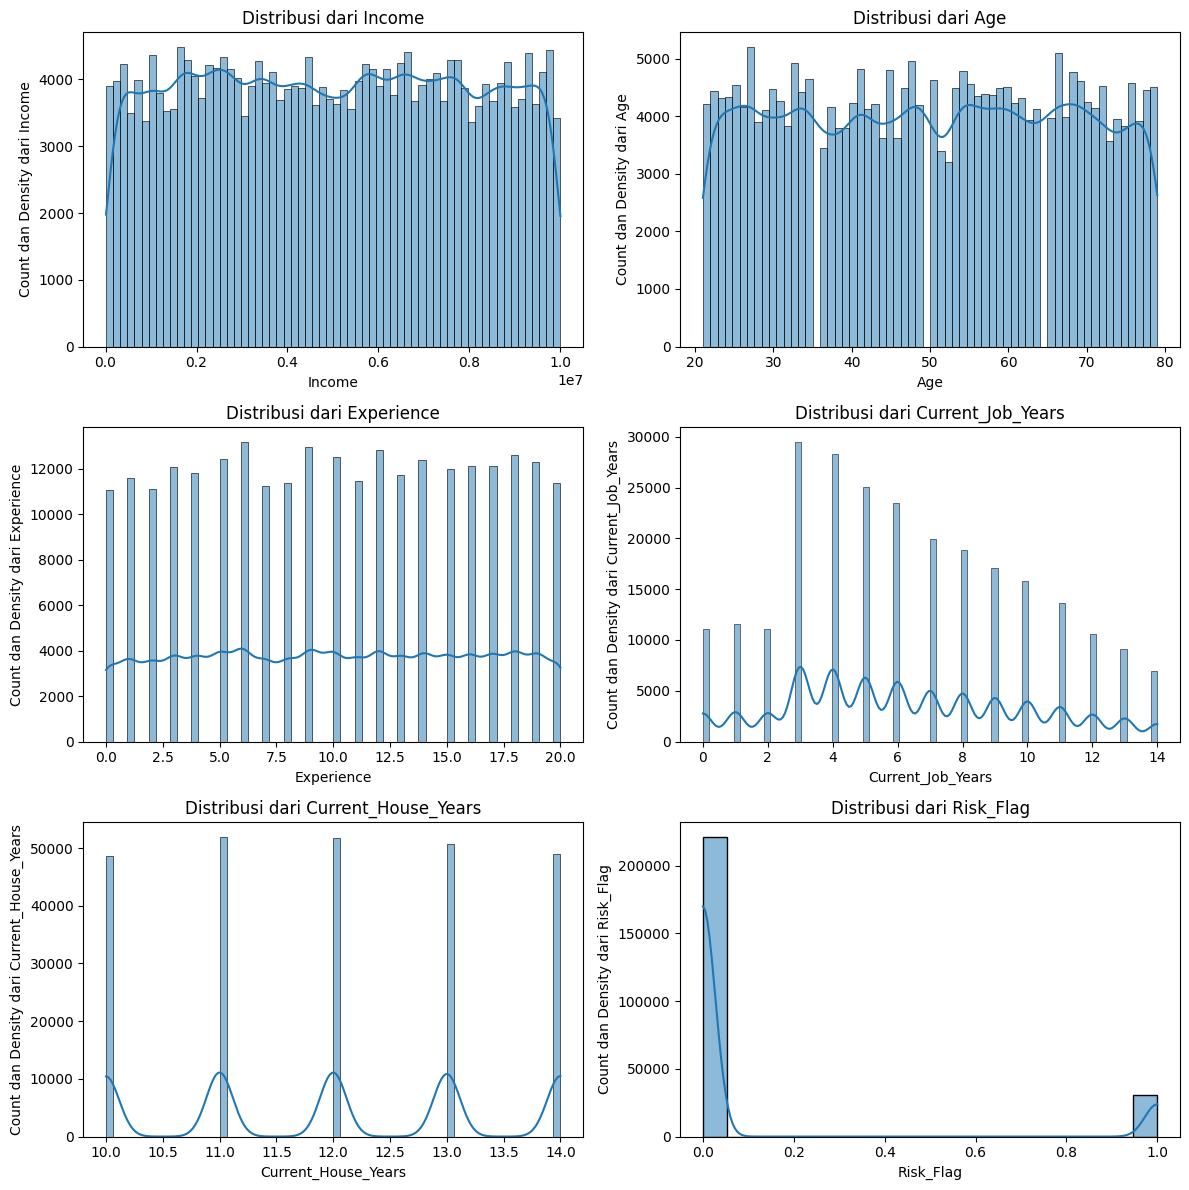

In [ ]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(data = df, ax=axes[i], x=nums[i], kde=True)
  axes[i].set_title(f'Distribusi dari {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density dari {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

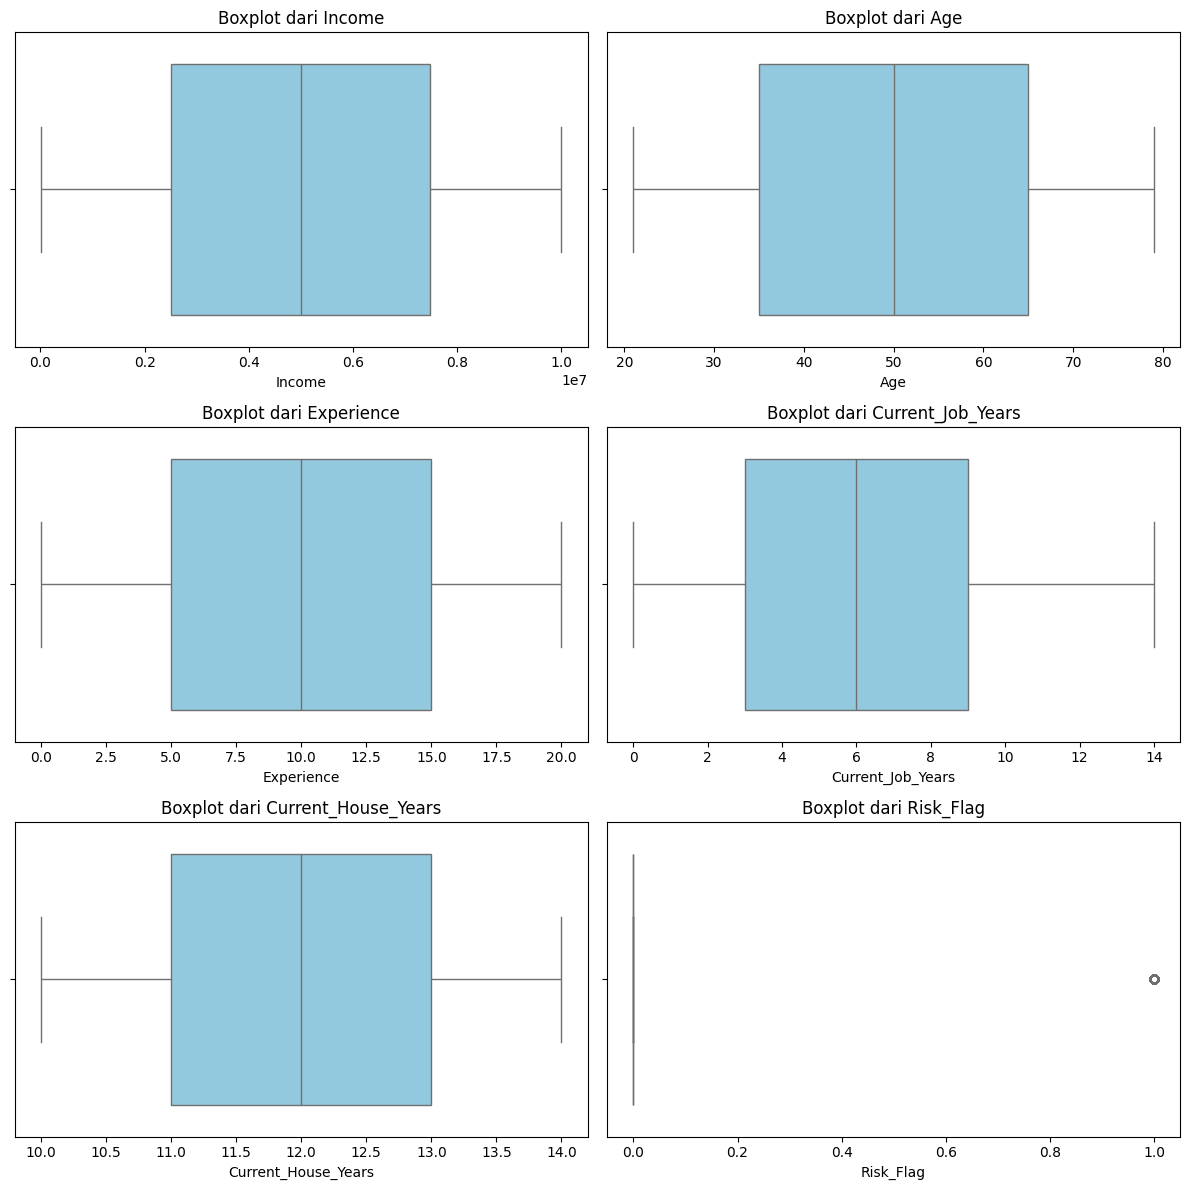

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot dari {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

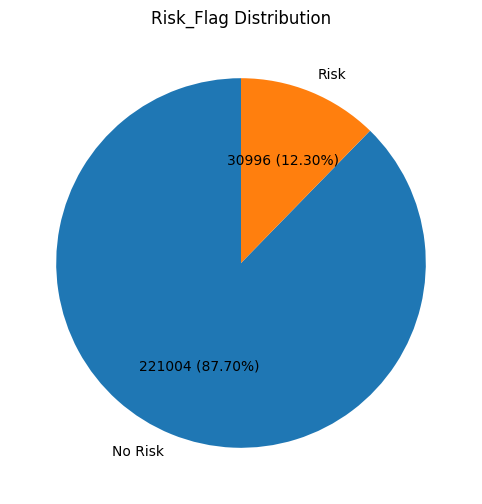

In [ ]:
# Risk_Flag Distribution (Combined Pie Chart)
fig, ax = plt.subplots(figsize=(12, 6))
labels = ['No Risk', 'Risk']
sizes = df['Risk_Flag'].value_counts()

ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.2f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
ax.set_title('Risk_Flag Distribution')
plt.show()

## Categorical Columns

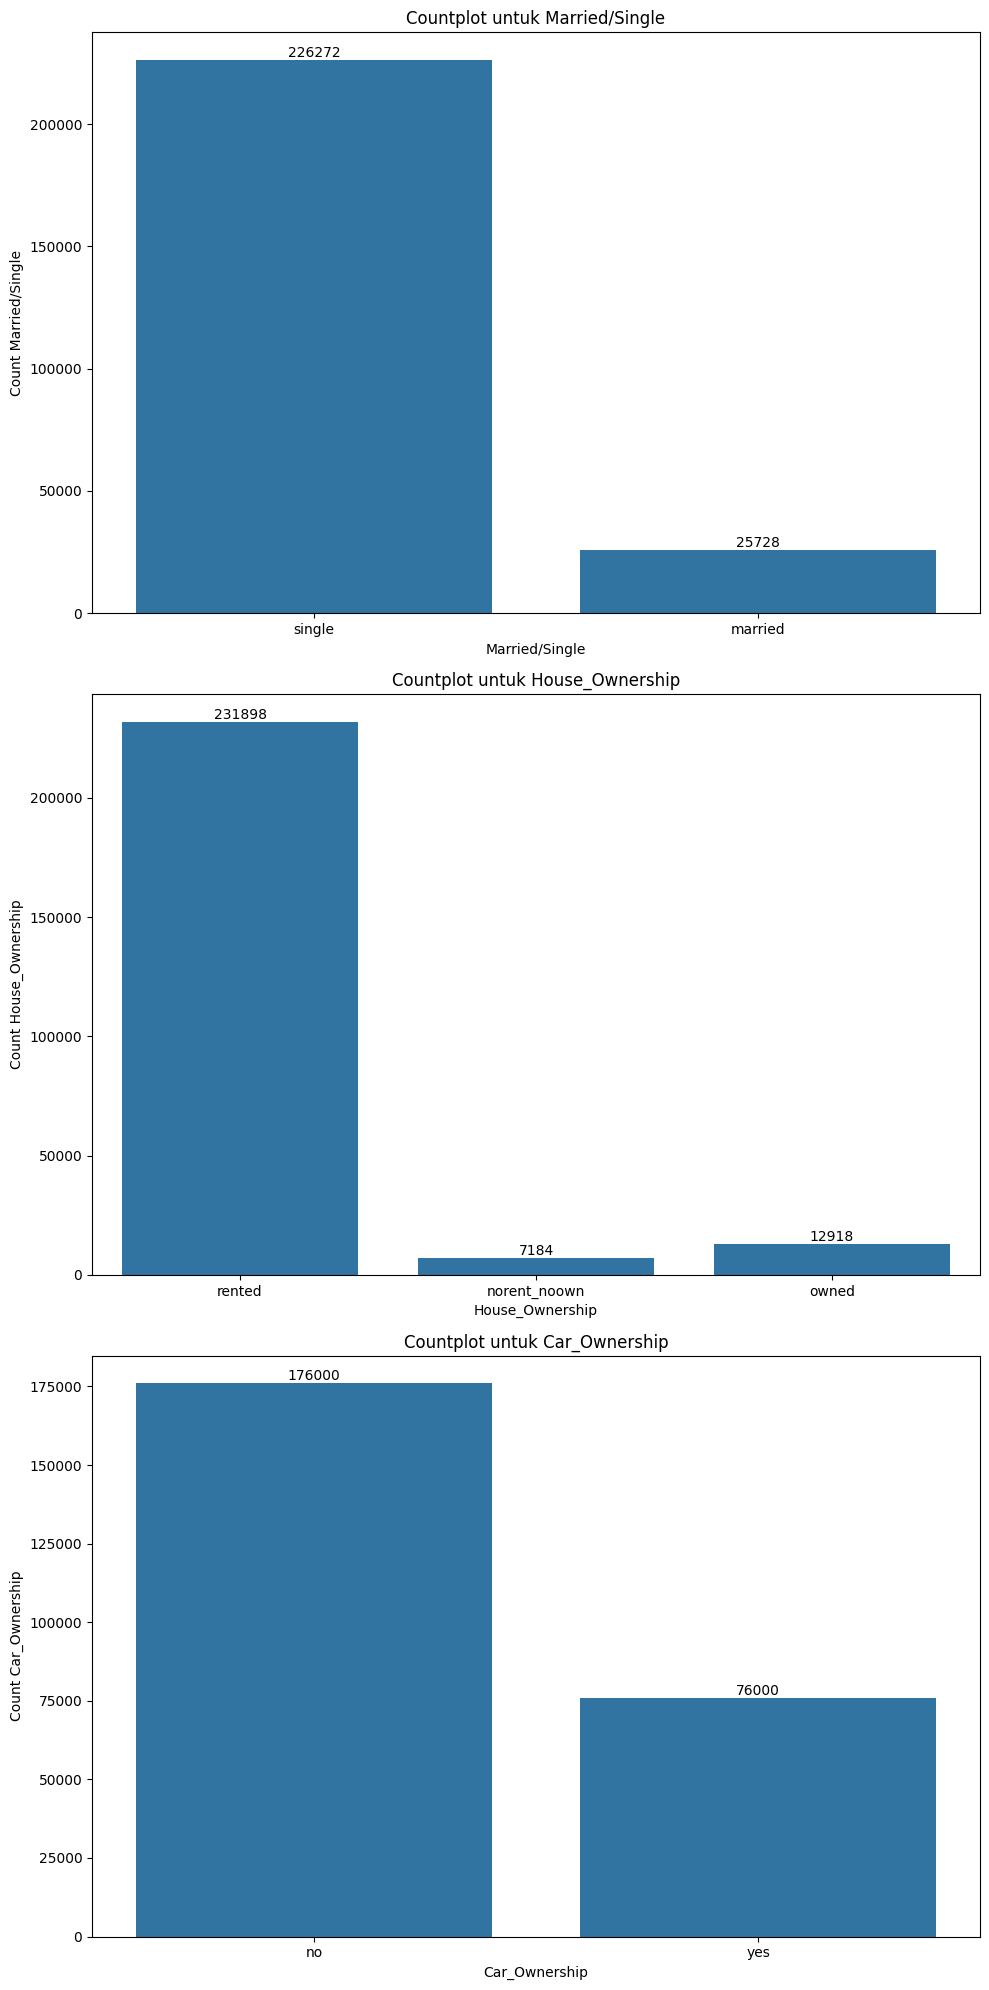

In [ ]:
# Countplot Categorical (Sedikit)
cats_few = ['Married/Single', 'House_Ownership', 'Car_Ownership']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(data = df, ax=axes[i], x=cats_few[i])
    axes[i].set_title(f'Countplot untuk {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')
    axes[i].bar_label(axes[i].containers[0])

plt.tight_layout()
plt.show()

Profession, State, dan City terlalu banyak untuk dilakukan plotting secara keseluruhn, maka akan dilihat secara top 10 saja

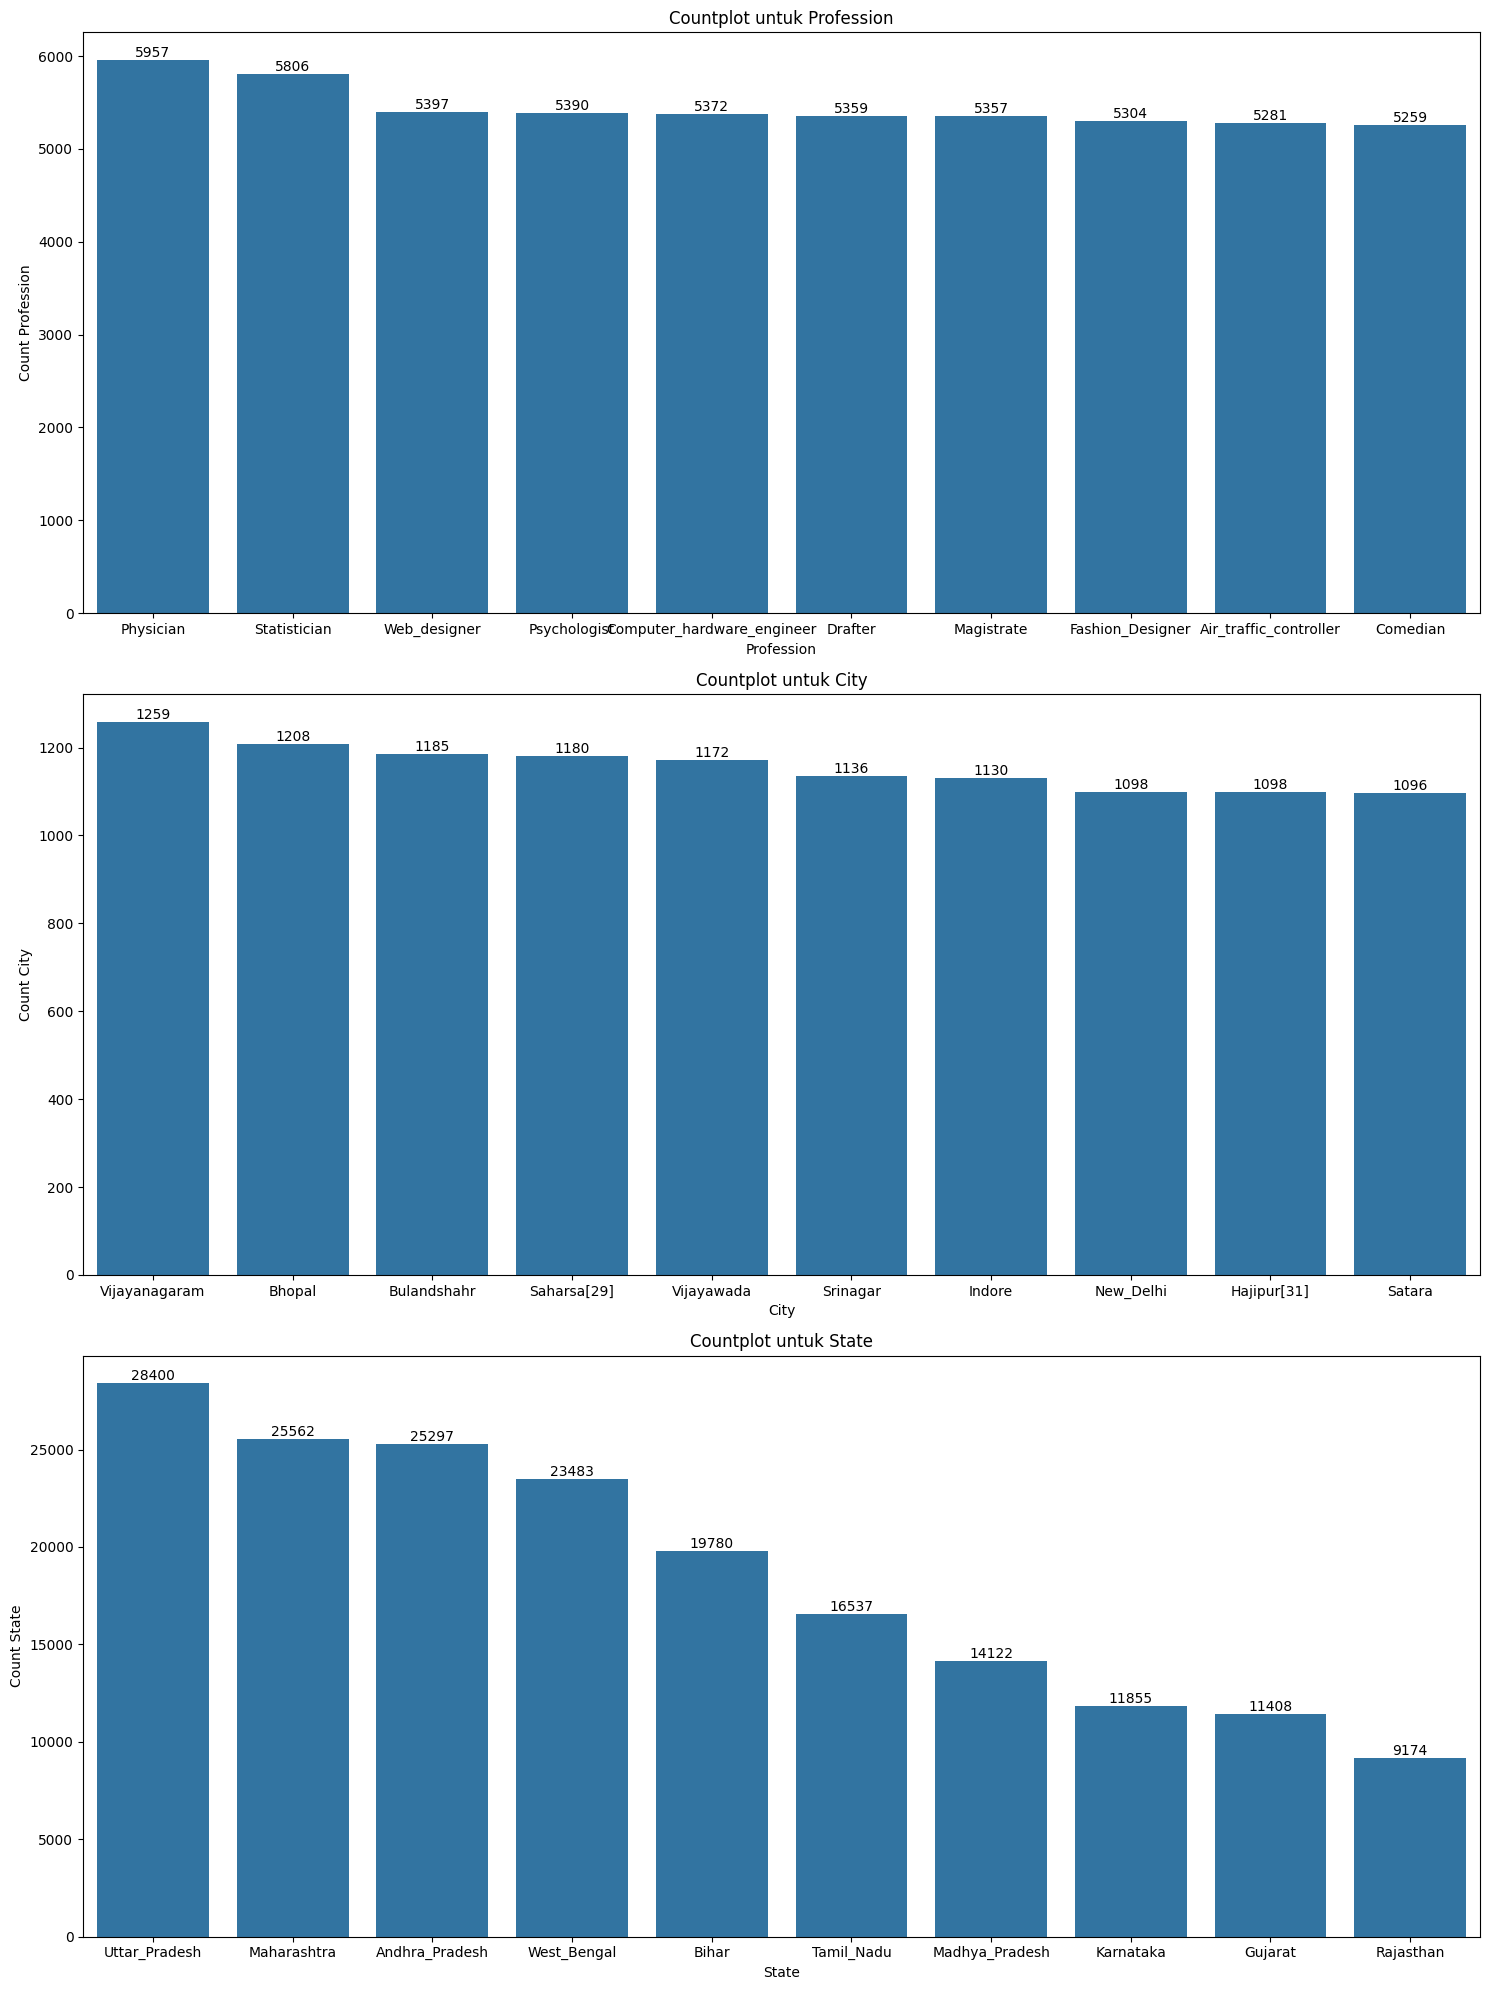

In [ ]:
# Countplot Categorical (Banyak Top 10)
cats_many = ['Profession', 'City', 'State']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

for i in range(len(cats_many)):
    ax = sns.countplot(data = df, ax=axes[i], x=cats_many[i], order=df[cats_many[i]].value_counts().iloc[:10].index)
    axes[i].set_title(f'Countplot untuk {cats_many[i]}')
    axes[i].set_ylabel(f'Count {cats_many[i]}')
    axes[i].tick_params(axis='x')
    axes[i].bar_label(axes[i].containers[0])

plt.tight_layout()
plt.show()

# Univariate Analysis Findings

A.  Untuk analisis pada kolom numerical, ditemukan beberapa hal seperti :

1. Untuk target (Risk_Flag) distribusinya merupakan bimodal dan cukup mendominasi pada nilai 0 (Tidak gagal bayar atau tidak default)

2. Feature Income, Age, & Experience memiliki distribusi yg cenderung seragam/uniform, feature Current_House_Years memiliki distribusi multi-modal, dan feature Current_Job_Years memiliki distribusi non-normal (skewed multi-modal) yang ditunjukkan oleh histplot dengan kde. Untuk keseluruhan feature numerical tidak terdapat outliers yang ditunjukkan oleh boxplot

3. Beberapa feature perlu dilakukan scaling seperti income dan age

B.  Untuk analisis pada kolom categorical, ditemukan beberapa hal seperti :

1. Kategori pada feature Profession, City, dan State yang terlalu banyak untuk dilakukan plotting

2. Terdapat feature dengan nilai mendominasi, antara lain: (nama kolom: nilai)
- Car_Ownership: no
- House_Ownership: rented
- Married/Single: single

C. Beberapa hal yang harus di follow-up saat data pre-processing antara lain :

1. Menghandle data categorical dari feature Profession, City, dan State yang terlalu banyak, bisa dilakukan dengan grouping/pengelompokkan tertentu dengan tujuan mengurangi jumlah nilai sebelum melakukan encoding

2. Mungkin perlu dilakukan resampling karena adanya class imbalance pada target dimana Risk_Flag 1 (Gagal bayar) hanya 12.3% dari total data yang dimana kasus ini tergolong degree of imbalance moderate(1-20%)

# Bivariate/Multivariate Analysis

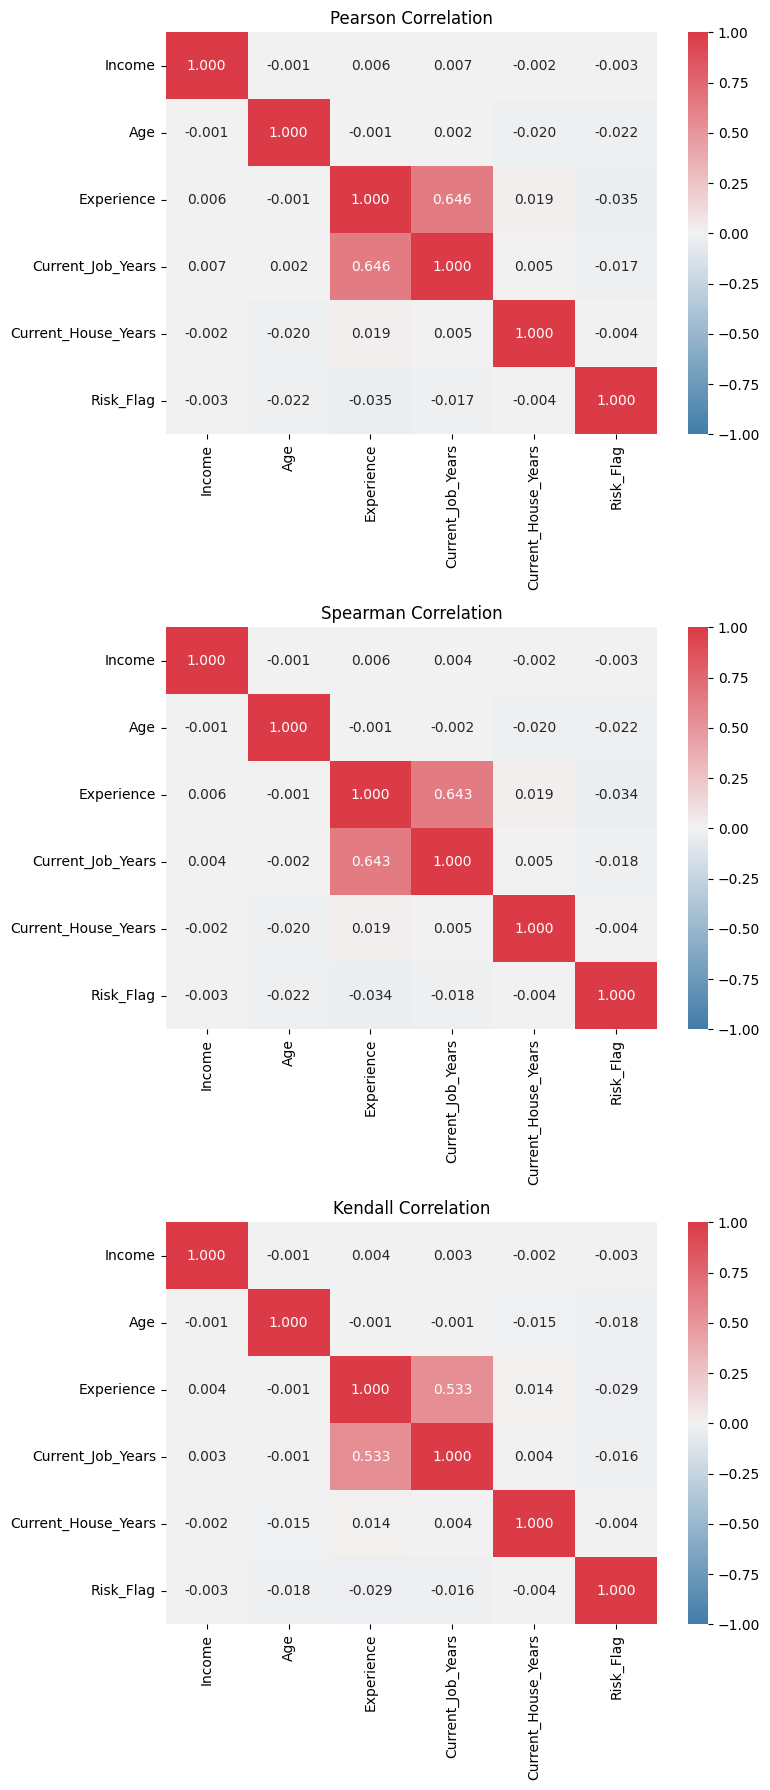

In [ ]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# Define colormap
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
sns.heatmap(data=df.corr(numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=axs[0])
axs[0].set_title('Pearson Correlation')

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Spearman Correlation')

# Plot correlation heatmap with Kendall method
sns.heatmap(data=df.corr(method='kendall', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=axs[2])
axs[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

Melihat hubungan antara feature-feature dan feature-target yang tidak linear pada pairplot (scatterplot matrix) dibawah, maka kurang tepat dalam penggunaaan metode Pearson. Sehingga dalam melihat korelasinya jika ingin menggunakan df.corr() adalah pada hasil metode Spearman yang dapat menangkap hubungan non-linear

# Multivariate Analysis Findings

A. Untuk sementara dari proses EDA ini (sebelum melakukan feature encoding) hubungan antar keseluruhan feature numerical yang ada dengan target tergolong memiliki korelasi yang rendah (<0.04). Feature yang paling relevan adalah Experience (-0.034), Age (-0.022), dan Current_Job_Years (-0.018).

B. Feature Experience dan Current_Job_Years memiliki korelasi positif yang cukup tinggi (0.646). Hal ini memiliki arti bahwa semakin besar experience yang dimiliki, maka semakin lama pula current_job_years nya sekaligus mengindikasikan bahwa kedua feature ini cukup redundan sehingga perlu di-drop salah satunya; dalam hal ini yang akan di-drop nantinya adalah feature Current_Job_Years (-0.018) karena memiliki korelasi lebih rendah terhadap target dibandingkan feature Experience. Sedangkan untuk hubungan antar fitur lainnya memiliki korelasi cukup rendah <= 0.02.

# Business Insight

### Default by Married/Single, House Ownership, and Car Ownership

#### Plotting Secara Jumlah

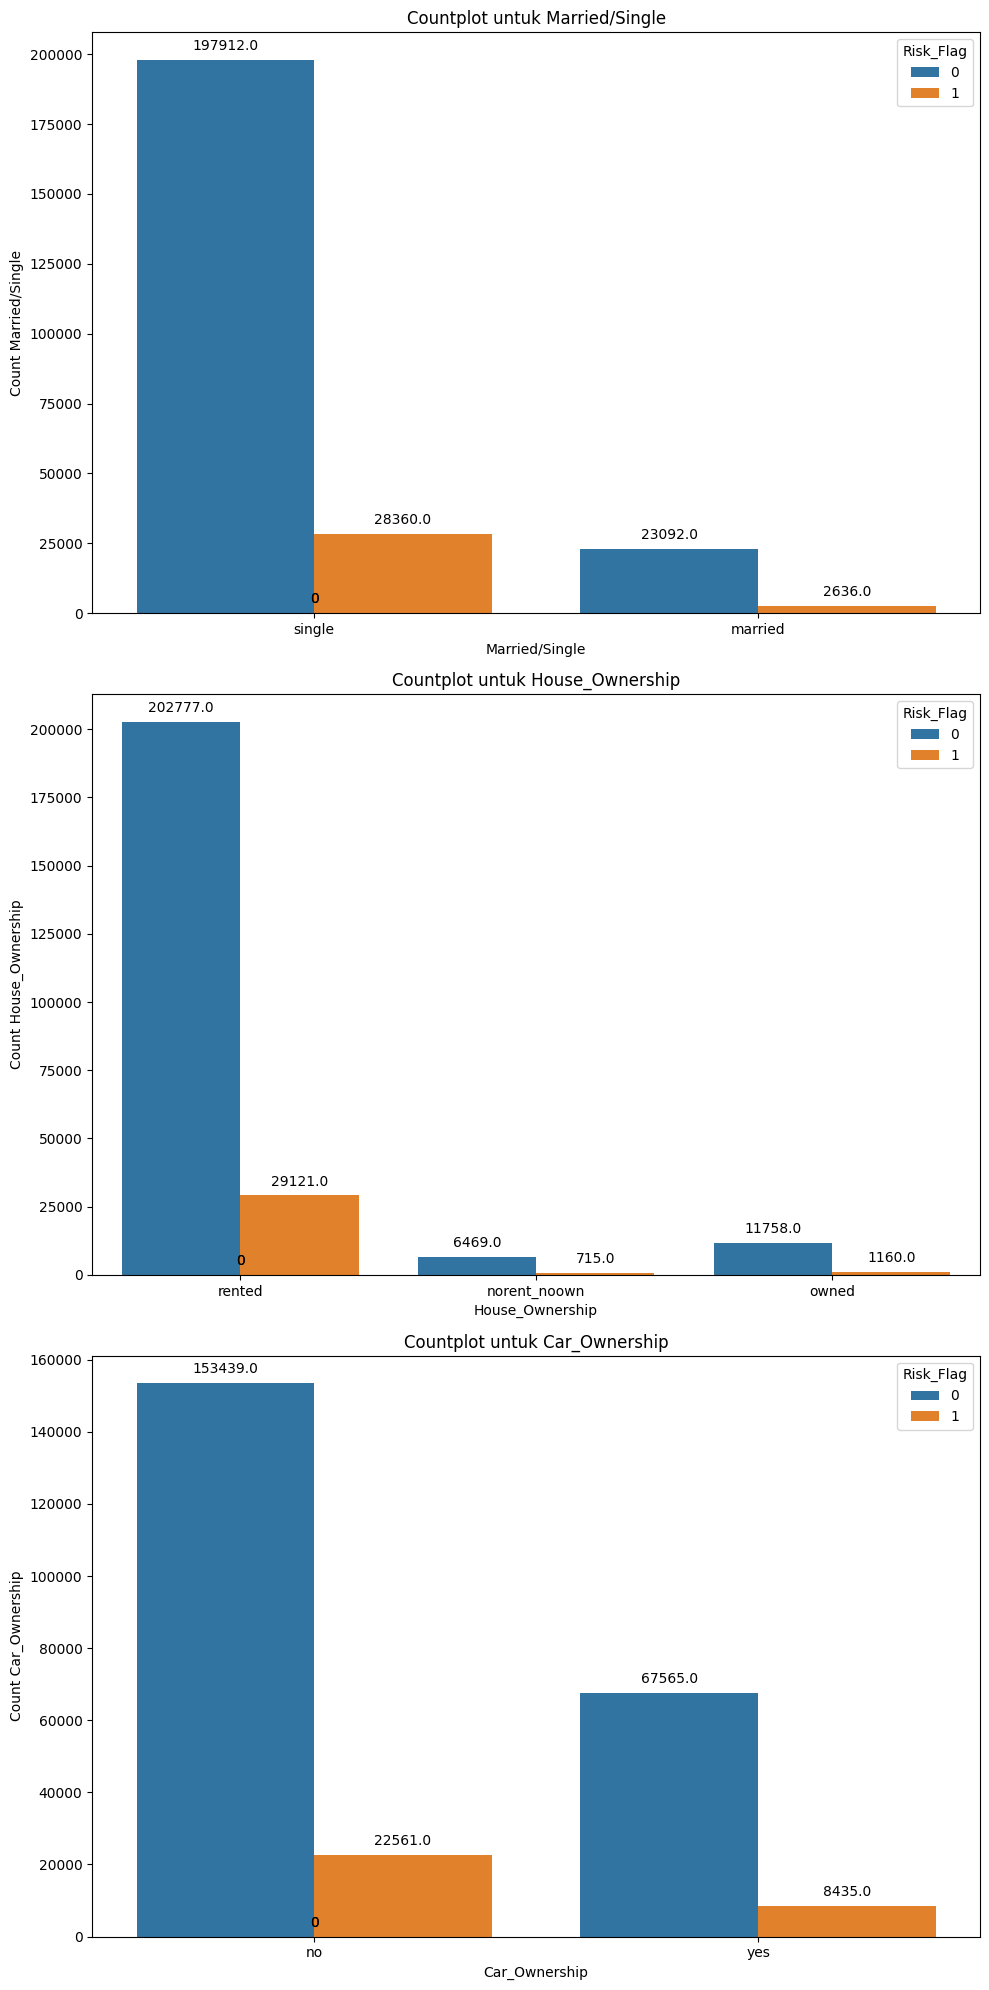

In [ ]:
# Countplot Categorical (Sedikit)
cats_few = ['Married/Single', 'House_Ownership', 'Car_Ownership']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]], hue='Risk_Flag', data=df)
    axes[i].set_title(f'Countplot untuk {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Plotting Secara Rasio

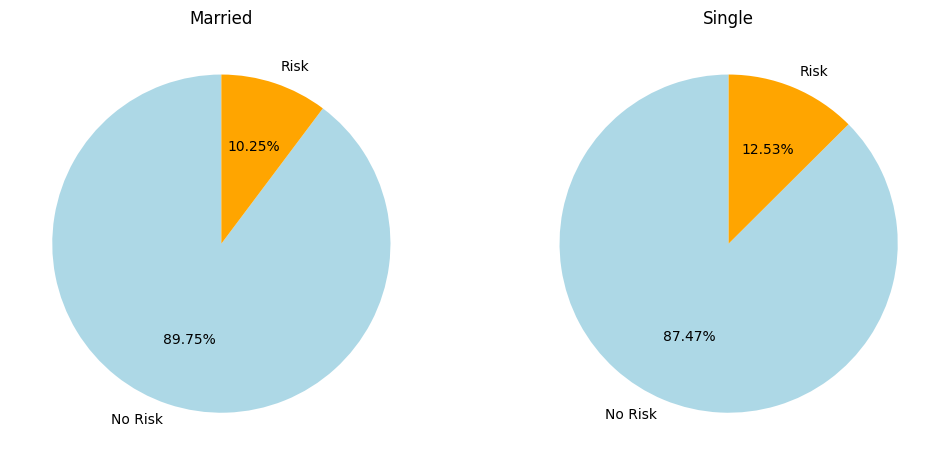

In [ ]:
# Proporsi Married/Single terhadap risk_flag
proporsi_married_status = df.groupby(['Married/Single', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(proporsi_married_status.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_married_status.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)

ax[0].set_title('Married')
ax[1].set_title('Single')

plt.show()

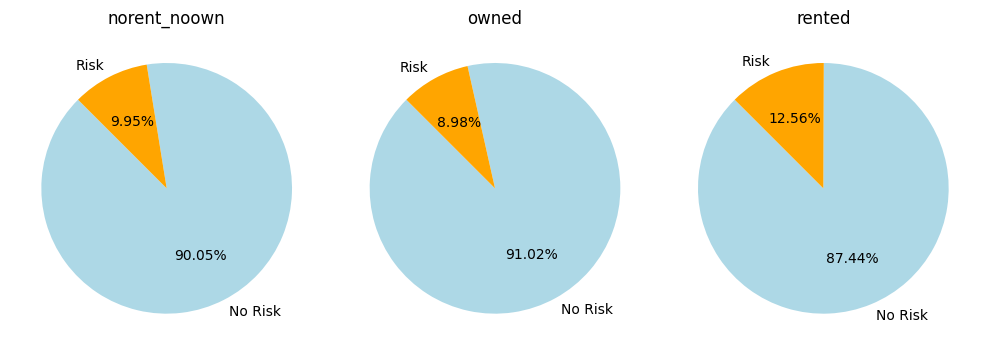

In [ ]:
# Menghitung proporsi House_Ownership terhadap Risk_Flag
proporsi_house_ownership = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

# Pie chart untuk Risk_Flag = 0
ax[0].pie(proporsi_house_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[0].set_title('norent_noown')

# Pie chart untuk Risk_Flag = 1
ax[1].pie(proporsi_house_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[1].set_title('owned')

# Pie chart untuk seluruh data
ax[2].pie(proporsi_house_ownership.iloc[2,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[2].set_title('rented')

plt.tight_layout()
plt.show()

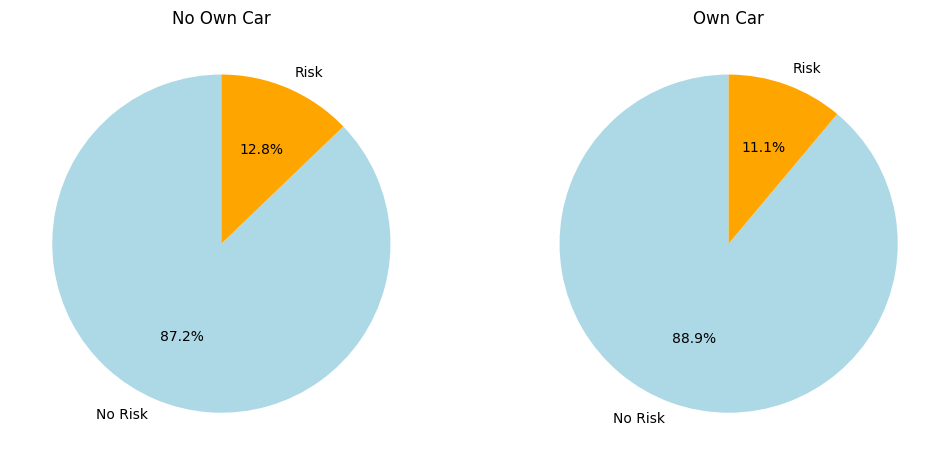

In [ ]:
# Proporsi car ownership terhadap risk_flag
proporsi_car_ownership = df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
labels = proporsi_car_ownership.columns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(proporsi_car_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_car_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)

ax[0].set_title('No Own Car')
ax[1].set_title('Own Car')

plt.show()

Insight :

Dari informasi feature kategorikal, customer yang mengajukan pinjaman (loan) kebanyakan berasal dari golongan yang single, hanya memiliki rumah sewa (rented), dan tidak memiliki mobil. Jika dibandingkan untuk setiap kategori, maka :

* Pertama berdasarkan status married atau single, customer yang single sedikit lebih cenderung berpotensi gagal bayar (default) dibandingkan customer married
* Kedua, berdasarkan status rumah customer, customer yang memiliki rumah sewa (rented) cenderung memiliki potensi gagal bayar yang lebih tinggi (default) dibandingkan customer yang memiliki rumah pribadi atau tidak memiliki rumah/sewa
* Ketiga, berdasarkan status kepemilikan kendaraan mobil, customer yang tidak memiliki mobil sedikit lebih cenderung berpotensi gagal bayar dibandingkan yang memiliki mobil

Namun, perlu digarisbawahi bahwa hal-hal tersebut bisa jadi bias dikarenakan jumlah dari data yang tersedia terhadap kategori tersebut yang memang lebih banyak dibandingkan kategori yang lainnya.

### Default by Profession

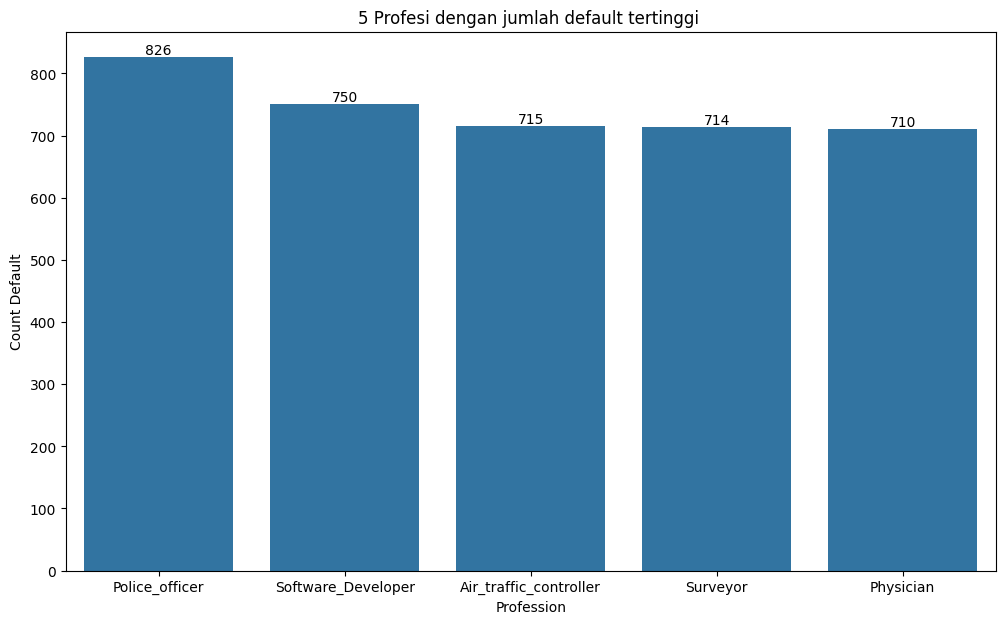

In [ ]:
# Top 5
plt.figure(figsize=(12,7))

default_profession_top_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
ax = sns.barplot(x='Profession', y='Risk_Flag', data=default_profession_top_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 Profesi dengan jumlah default tertinggi ')
plt.show()

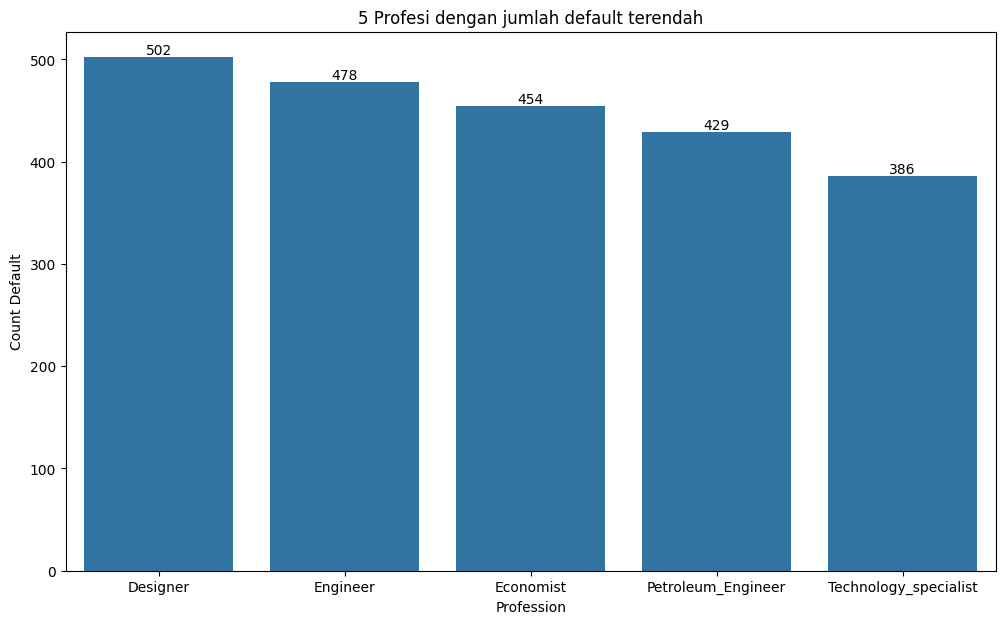

In [ ]:
# Bottom 5
plt.figure(figsize=(12,7))

default_profession_bottom_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
ax = sns.barplot(x='Profession', y='Risk_Flag', data=default_profession_bottom_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 Profesi dengan jumlah default terendah')
plt.show()

Insight :

Police_Officer, Software_Developer, Air_Traffic_Controller, Surveyor, dan Physician merupakan profesi yang memiliki jumlah default paling tinggi; sedangkan profesi Designer, Engineer, Economist, Petroleum_Engineer, Technology_Specialist merupakan profesi dengan jumlah default terendah

### Default by State

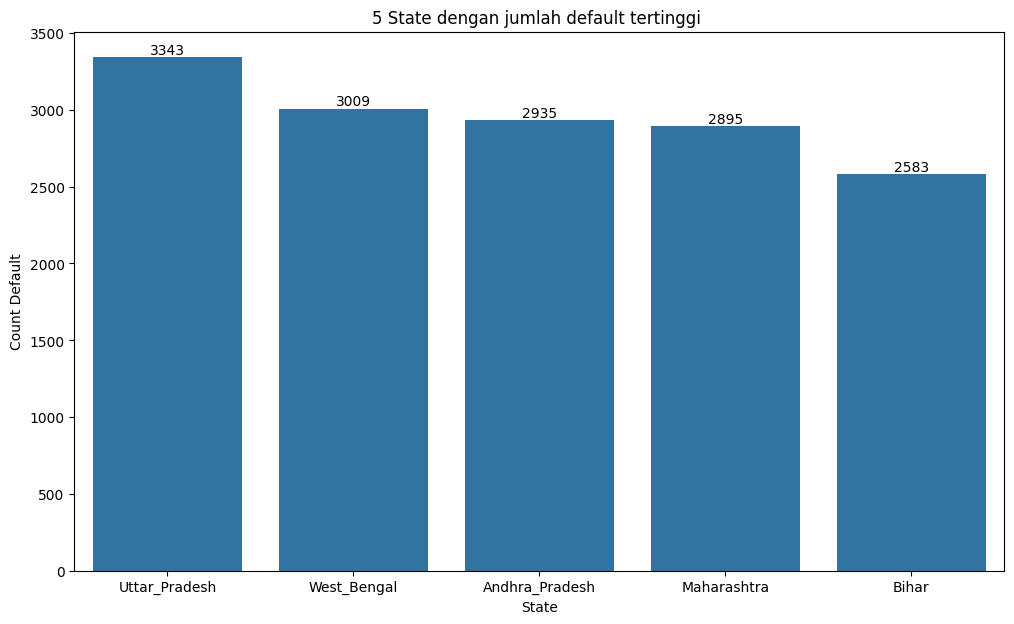

In [ ]:
# Top 5
plt.figure(figsize=(12,7))

default_state_top_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
ax = sns.barplot(x='State', y='Risk_Flag', data=default_state_top_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 State dengan jumlah default tertinggi ')
plt.show()

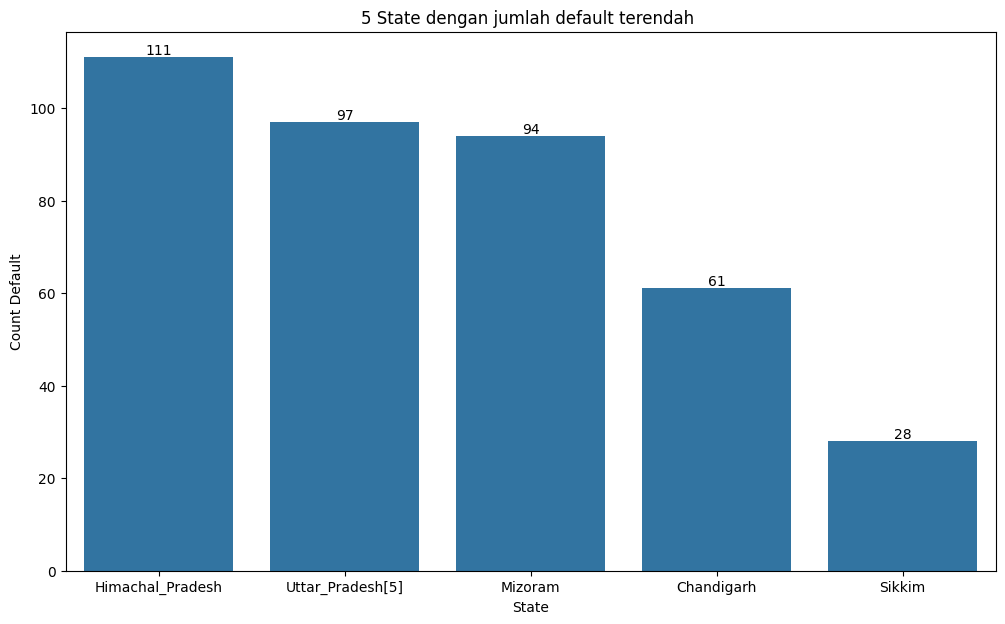

In [ ]:
# Bottom 5
plt.figure(figsize=(12,7))

default_state_bottom_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
ax = sns.barplot(x='State', y='Risk_Flag', data=default_state_bottom_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 State dengan jumlah default terendah ')
plt.show()

Insight :

Uttar Pradesh, West Bengal, Andhra Pradesh, Mahasashtra, dan Bihar adalah 5 besar state yang memiliki customer dengan default paling besar; sedangkan Himachal_Pradesh, Uttar_Pradesh[5], Mizoram, Chandigarh, dan Sikkim merupakan state dengan jumlah customer default terendah



### Default by City

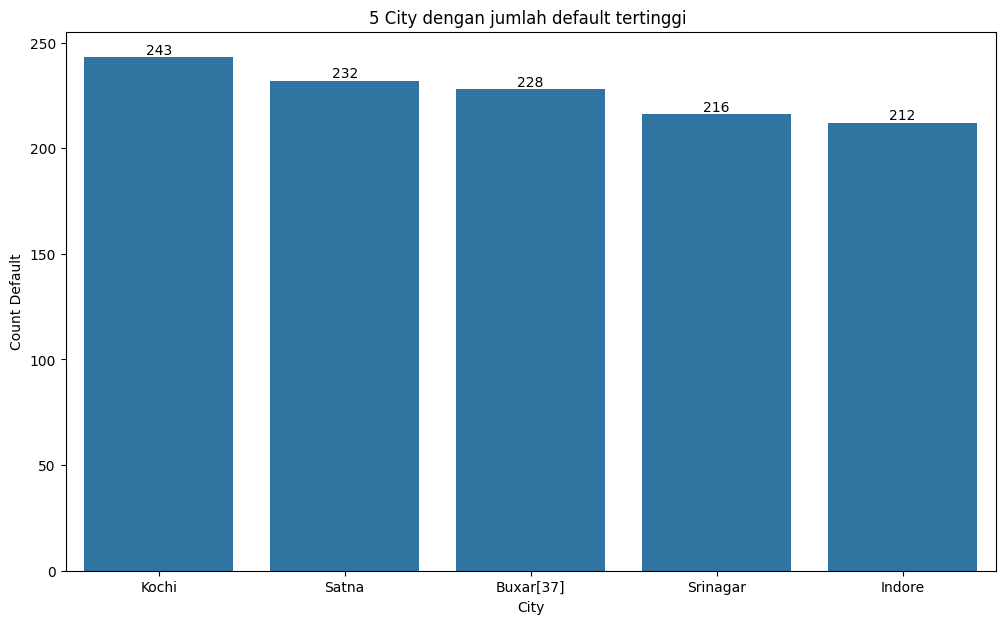

In [ ]:
# Top 5
plt.figure(figsize=(12,7))

default_city_top_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().head(5)
ax = sns.barplot(x='City', y='Risk_Flag', data=default_city_top_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 City dengan jumlah default tertinggi ')
plt.show()

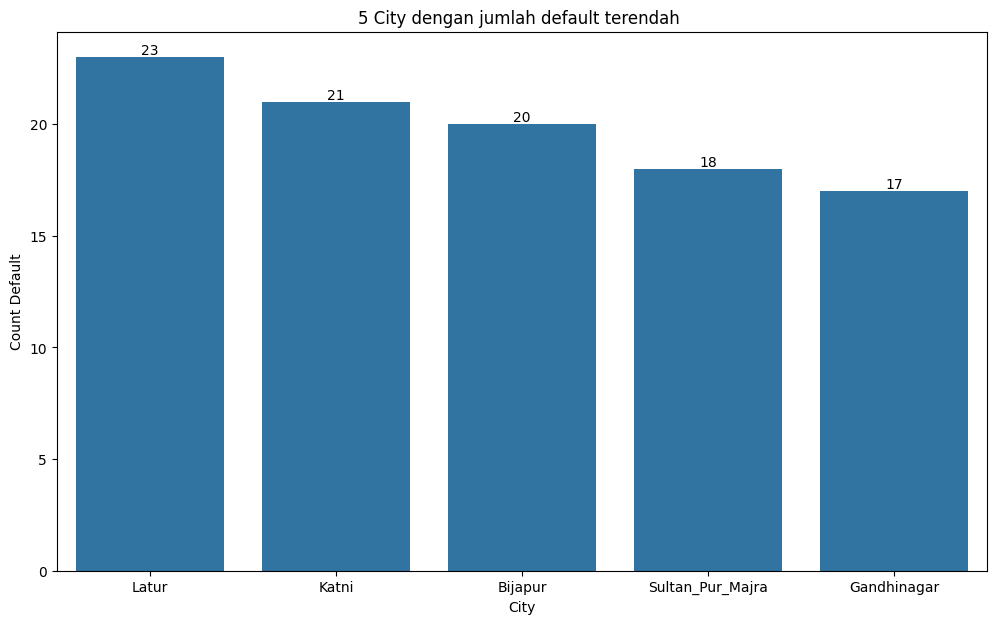

In [ ]:
# Bottom 5
plt.figure(figsize=(12,7))

default_city_bottom_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(['Risk_Flag'], ascending=False).reset_index().tail(5)
ax = sns.barplot(x='City', y='Risk_Flag', data=default_city_bottom_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Count Default')
plt.title('5 City dengan jumlah default terendah ')
plt.show()

Insight :

Kochi, Satna, Buxar[37], Srinagar, dan Indore adalah 5 besar city yang memiliki customer dengan default paling besar; sedangkan Latur, Katni, Bijapur, Sultan_Pur_Majra, Ganhinagar merupakan city dengan jumlah customer default terendah


# Business Recommendation

1. Perusahaan perlu mengurangi/membatasi nasabah yang tidak memiliki mobil karena memiliki resiko gagal bayar lebih tinggi daripada nasabah yang memiliki mobil<br>
2. Perusahaan perlu mengurangi/membatasi nasabah yang memiliki status single daripada status married
3. Perusahaan perlu mengurangi/membatasi nasabah dengan status rumah rented(sewa)
4. Perusahaan perlu mengurangi/membatasi nasabah yang ingin mengajukan pinjaman dari profesi, state, dan city tertentu yang memiliki data historical default tinggi dan menambah nasabah yang berasal dari profesi, state, dan city tertentu yang memiliki data historical default rendah sesuai temuan pada insight

# STAGE 2

# Pre-Processing & Feature Engineering

Telah ditemukan beberapa hal penting pada bagian sebelumnya, antara lain :
1. Dalam dataset ini tidak terdapat missing values, duplicated values, dan outliers
2. Untuk cleaning mungkin perlu dilakukan pengecekan lebih lanjut terlebih dahulu pada feature categorical yang memiliki unique values yang cukup banyak seperti Profession, City, dan State. Jika setelah dicleaning muncul missing atau duplicated values akan dihandle baik dengan drop ataupun fill
3. Perlu dilakukan scaling untuk feature numerical yang skalanya besar seperti Income (semua feature nanti bakal di scaling)

In [ ]:
# Make a copy of original dataframe for preprocessing and encoding process
df_encoding = df.copy()
df_encoding.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Cleaning and Encoding for Profession

In [ ]:
# Checking every unique values in Profession
df_encoding['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

- Tidak ada yang aneh dari setiap nilai pada feature profession, mungkin selain dilakukan frequency(count), label, atau binary encoding untuk originalnya juga akan dicoba ditambahkan feature extraction nantinya dengan melakukan pengelompokkan baru berdasarkan tipe profesinya (ex : Engineer, Government and Public Service, dll).
- Encoding dilakukan pada bagian feature extraction karena membutuhkan informasi nama setiap profesi dalam membuat grup.

## Cleaning and Encoding for State

In [ ]:
# Checking every unique values in State
df_encoding['State'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

- Terdapat satu State yang sama namanya dimana satunya ada tambahan keterangan angka dalam square brackets [] yaitu Uttar_Pradesh dan Uttar_Pradesh[5], akan dilakukan pengecekan apakah kedua nilai ini signifikan terhadap dataset dengan melihat jumlahnya.
- Untuk saat ini pengecekan nama yang mirip tersebut hanya menggunakan find and replace tools dari notebook (cntrl + H)

In [ ]:
# Check significance for Uttar_Pradesh State
df_encoding[df_encoding['State'] == 'Uttar_Pradesh']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
34,9086933,55,7,single,rented,no,Air_traffic_controller,Saharanpur,Uttar_Pradesh,7,13,0
64,6178223,46,19,single,owned,yes,Architect,Kanpur,Uttar_Pradesh,11,13,0
85,5898669,32,9,married,rented,no,Firefighter,Aligarh,Uttar_Pradesh,6,13,0
117,4759451,60,4,married,rented,no,Official,Meerut,Uttar_Pradesh,4,13,0
120,8769550,23,13,single,rented,no,Computer_hardware_engineer,Ghaziabad,Uttar_Pradesh,9,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251964,520057,40,13,single,rented,yes,Analyst,Shahjahanpur,Uttar_Pradesh,13,14,0
251965,2666519,47,20,married,rented,no,Comedian,Noida,Uttar_Pradesh,3,11,0
251968,9600165,68,13,single,rented,yes,Secretary,Loni,Uttar_Pradesh,13,14,1
251986,9984814,62,6,single,rented,no,Computer_hardware_engineer,Mathura,Uttar_Pradesh,6,10,0


In [ ]:
# Check significance for Uttar_Pradesh[5] State
df_encoding[df_encoding['State'] == 'Uttar_Pradesh[5]']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
262,461499,68,2,married,rented,no,Official,Allahabad,Uttar_Pradesh[5],2,11,0
573,1551179,24,19,single,rented,no,Drafter,Allahabad,Uttar_Pradesh[5],9,14,0
1016,4660286,60,6,single,rented,no,Civil_servant,Allahabad,Uttar_Pradesh[5],6,11,0
1331,7374419,43,13,single,rented,yes,Chef,Allahabad,Uttar_Pradesh[5],9,13,0
1938,5400619,71,1,single,rented,no,Software_Developer,Allahabad,Uttar_Pradesh[5],1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249978,3222088,33,16,single,rented,no,Civil_engineer,Allahabad,Uttar_Pradesh[5],10,11,0
249980,9075906,61,6,single,rented,no,Microbiologist,Allahabad,Uttar_Pradesh[5],3,10,1
251139,1926204,46,0,single,rented,no,Engineer,Allahabad,Uttar_Pradesh[5],0,13,1
251564,2051595,62,1,single,rented,no,Microbiologist,Allahabad,Uttar_Pradesh[5],1,12,0


- State Uttar_Pradesh memiliki 28400 row data sedangkan state Uttar_Pradesh[5] hanya memiliki 743 row data saja.

- Pada State Uttar_Pradesh[5] sepertinya hanya memiliki City Allahabad saja, akan dilakukan pengecekan terlebih dahulu

In [ ]:
# Check Cities in Uttar_Pradesh State
df_encoding[df_encoding['State'] == 'Uttar_Pradesh'].City.value_counts()

Bulandshahr         1185
Bareilly            1036
Agra                1012
Farrukhabad          985
Bahraich             970
Gorakhpur            965
Jhansi               948
Ghaziabad            939
Amroha               915
Kanpur               913
Khora,_Ghaziabad     905
Unnao                903
Orai                 894
Raebareli            877
Hapur                865
Aligarh              858
Ballia               830
Sambhal              802
Saharanpur           794
Mau                  791
Jaunpur              774
Noida                729
Mirzapur             723
Mathura              718
Fatehpur             718
Firozabad            713
Muzaffarnagar        668
Varanasi             663
Meerut               658
Rampur               648
Lucknow              645
Moradabad            631
Etawah               615
Shahjahanpur         601
Loni                 509
Name: City, dtype: int64

In [ ]:
# Check Cities in Uttar_Pradesh[5] State
df_encoding[df_encoding['State'] == 'Uttar_Pradesh[5]'].City.value_counts()

Allahabad    743
Name: City, dtype: int64

In [ ]:
#Check for significance to risk flag
print(f"{df_encoding[df_encoding['State'] == 'Uttar_Pradesh'].Risk_Flag.value_counts()}")
print(f"{df_encoding[df_encoding['State'] == 'Uttar_Pradesh[5]'].Risk_Flag.value_counts()}")

0    25057
1     3343
Name: Risk_Flag, dtype: int64
0    646
1     97
Name: Risk_Flag, dtype: int64


<Axes: xlabel='Income', ylabel='Count'>

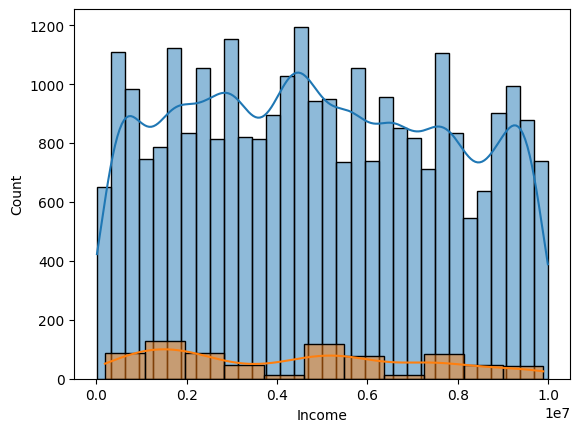

In [ ]:
#Check for significance to income
sns.histplot(data= df_encoding[df_encoding['State'] == 'Uttar_Pradesh'].Income, kde=True)
sns.histplot(data= df_encoding[df_encoding['State'] == 'Uttar_Pradesh[5]'].Income, kde=True)

Pada Statre Uttar_Pradesh[5] hanya memiliki City Allahabad, dan city tersebut tidak ada di State Uttar_Pradesh. Untuk sekarang karena jumlahnya datanya yang sangat sedikit dan setelah ditinjau tidak akan terlalu berpengaruh signifikan pada Risk_Flag dan feature Income (alasan peninjauan pada income penting dapat dilihat pada bagian evaluasi model) maka diganti saja Uttar_Pradesh[5] menjadi Uttar_Pradesh

In [ ]:
# Replace Uttar_Pradesh state[5] to Uttar_Pradesh
df['State'] = df['State'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
#Frequency/Count Encoding for State
import category_encoders as ce
count_encoder = ce.CountEncoder()
df_encoding['State'] = count_encoder.fit_transform(df_encoding['State'])
df_encoding

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,14122,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,25562,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,5805,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,4658,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],16537,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,23483,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,14122,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,25562,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,1433,0,10,0


In [ ]:
#Effect of Frequency/Count or Label Encoding to original feature
original_features = df['State'].unique()
encoded_features = df_encoding['State'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'Madhya_Pradesh' : 14122
'Maharashtra' : 25562
'Kerala' : 5805
'Odisha' : 4658
'Tamil_Nadu' : 16537
'Gujarat' : 11408
'Rajasthan' : 9174
'Telangana' : 7524
'Bihar' : 19780
'Andhra_Pradesh' : 25297
'West_Bengal' : 23483
'Haryana' : 7890
'Puducherry' : 1433
'Karnataka' : 11855
'Uttar_Pradesh' : 28400
'Himachal_Pradesh' : 833
'Punjab' : 4720
'Tripura' : 809
'Uttarakhand' : 1874
'Jharkhand' : 8965
'Mizoram' : 849
'Assam' : 7062
'Jammu_and_Kashmir' : 1780
'Delhi' : 5490
'Chhattisgarh' : 3834
'Chandigarh' : 656
'Manipur' : 743
'Sikkim' : 608


## Cleaning and Encoding for City

In [ ]:
# Checking every unique values in City
df_encoding['City'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

- Terdapat satu City yang sama namanya dimana satunya ada tambahan keterangan angka dalam square brackets [] yaitu Aurangabad dan Aurangabad[39], akan dilakukan pengecekan apakah kedua nilai ini signifikan terhadap dataset dengan melihat jumlahnya.
- Selain itu, untuk City New_Delhi sepertinya sama saja dengan City Delhi_city.
- Untuk saat ini pengecekan nama yang mirip tersebut hanya menggunakan find and replace tools dari notebook (cntrl + H)

In [ ]:
# Checking for similar city name (contains 'city' word)
df_encoding[df_encoding['City'].str.lower().str.contains('city')]

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
216,152426,27,18,single,rented,no,Librarian,Delhi_city,5490,8,12,0
219,7115862,52,17,single,rented,no,Physician,Delhi_city,5490,14,11,0
246,2252443,77,0,single,rented,no,Surgeon,Chandigarh_city,656,0,11,0
254,1923950,50,12,single,rented,no,Geologist,Chandigarh_city,656,3,14,0
440,8914067,77,18,single,rented,yes,Economist,Delhi_city,5490,10,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251298,3414981,45,0,single,rented,no,Drafter,Delhi_city,5490,0,10,0
251322,7769323,39,12,single,rented,yes,Magistrate,Delhi_city,5490,12,12,0
251637,219531,28,15,single,rented,no,Computer_operator,Chandigarh_city,656,5,12,1
251707,9888940,59,20,single,rented,yes,Architect,Chandigarh_city,656,3,11,0


In [ ]:
df_encoding[df_encoding['City'] == 'Chandigarh_city']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
246,2252443,77,0,single,rented,no,Surgeon,Chandigarh_city,656,0,11,0
254,1923950,50,12,single,rented,no,Geologist,Chandigarh_city,656,3,14,0
772,3086136,60,9,single,rented,no,Dentist,Chandigarh_city,656,6,13,0
1119,5792307,24,9,single,rented,yes,Magistrate,Chandigarh_city,656,8,13,0
1189,1117607,53,13,married,rented,yes,Mechanical_engineer,Chandigarh_city,656,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251021,5756725,70,12,single,rented,yes,Analyst,Chandigarh_city,656,12,12,0
251249,1838739,64,8,single,rented,no,Fashion_Designer,Chandigarh_city,656,5,10,0
251637,219531,28,15,single,rented,no,Computer_operator,Chandigarh_city,656,5,12,1
251707,9888940,59,20,single,rented,yes,Architect,Chandigarh_city,656,3,11,0


In [ ]:
df_encoding[df_encoding['City'] == 'Delhi_city']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
216,152426,27,18,single,rented,no,Librarian,Delhi_city,5490,8,12,0
219,7115862,52,17,single,rented,no,Physician,Delhi_city,5490,14,11,0
440,8914067,77,18,single,rented,yes,Economist,Delhi_city,5490,10,11,0
617,8755938,42,20,single,rented,yes,Biomedical_Engineer,Delhi_city,5490,14,13,1
840,6550448,77,7,single,rented,yes,Fashion_Designer,Delhi_city,5490,7,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249961,7628126,51,6,single,rented,yes,Aviator,Delhi_city,5490,6,12,0
250241,7771350,51,13,single,rented,no,Economist,Delhi_city,5490,9,11,0
250780,6718403,43,13,single,rented,no,Army_officer,Delhi_city,5490,12,12,0
251298,3414981,45,0,single,rented,no,Drafter,Delhi_city,5490,0,10,0


In [ ]:
df_encoding[df_encoding['City'] == 'Chandigarh_city'].shape[0] + df_encoding[df_encoding['City'] == 'Delhi_city'].shape[0]

1252

Kasus city yang memiliki kata '_city' hanya dimiliki oleh Chandigarh_city dan Delhi_city (dilihat dari penjumlahan row). Kota yang bersamalah hanya pada Delhi_city yang mirip dengan New_Delhi

In [ ]:
df_encoding[df_encoding['City'] == 'New_Delhi']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
332,9815414,26,5,single,rented,no,Chartered_Accountant,New_Delhi,5490,5,14,1
379,3498735,38,3,single,rented,yes,Technician,New_Delhi,5490,3,14,0
531,2740172,72,16,single,rented,no,Engineer,New_Delhi,5490,10,13,0
732,2774757,36,11,single,rented,no,Civil_servant,New_Delhi,5490,10,11,0
902,848556,70,6,single,rented,yes,Hotel_Manager,New_Delhi,5490,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249341,6527711,51,7,single,rented,yes,Official,New_Delhi,5490,7,12,0
250363,3209867,50,5,single,rented,no,Flight_attendant,New_Delhi,5490,3,13,0
250931,8614227,44,13,single,rented,no,Comedian,New_Delhi,5490,13,12,0
251366,4900484,58,6,single,rented,no,Army_officer,New_Delhi,5490,6,13,1


Untuk New_Delhi dan Delhi_city karena kemungkinan besar sama (yang dapat dilihat pada keduanya memiliki state Delhi) maka akan diganti nilai Delhi_city menjadi New_Delhi

In [ ]:
# Replace Delhi_city city to New_Delhi
df['City'] = df['City'].replace('Delhi_city', 'New_Delhi')

In [ ]:
# Check significance for Aurangabad City
df_encoding[df_encoding['City'] == 'Aurangabad']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
180,9226716,55,3,single,rented,no,Graphic_Designer,Aurangabad,25562,3,11,0
454,649902,54,15,single,rented,no,Technician,Aurangabad,25562,8,11,1
1586,2662346,27,17,single,rented,no,Engineer,Aurangabad,25562,8,11,0
1928,9747887,40,19,single,rented,no,Web_designer,Aurangabad,25562,4,14,0
2037,9726816,73,0,single,rented,no,Chef,Aurangabad,25562,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
250922,1258697,40,14,single,rented,no,Dentist,Aurangabad,25562,4,12,0
251012,8768080,36,16,single,rented,no,Firefighter,Aurangabad,25562,10,14,0
251135,9517207,67,6,single,rented,no,Drafter,Aurangabad,25562,5,12,0
251201,4984551,52,11,single,rented,no,Scientist,Aurangabad,25562,11,13,0


In [ ]:
df_encoding[df_encoding['City'] == 'Aurangabad'].State.value_counts()

25562    835
Name: State, dtype: int64

In [ ]:
# Check significance for Aurangabad[39] City
df_encoding[df_encoding['City'] == 'Aurangabad[39]']

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
39,8739032,55,3,married,rented,no,Politician,Aurangabad[39],19780,3,14,0
1019,6488070,71,10,single,rented,no,Financial_Analyst,Aurangabad[39],19780,10,13,0
1562,5305500,38,3,single,rented,no,Politician,Aurangabad[39],19780,3,11,0
1740,7247559,59,5,single,rented,no,Surgeon,Aurangabad[39],19780,5,11,0
2812,9297948,33,11,single,rented,yes,Technician,Aurangabad[39],19780,8,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251276,6599526,59,0,single,rented,yes,Computer_hardware_engineer,Aurangabad[39],19780,0,11,0
251737,4238235,78,1,single,rented,yes,Microbiologist,Aurangabad[39],19780,1,12,0
251791,1536406,49,18,single,rented,no,Air_traffic_controller,Aurangabad[39],19780,6,10,0
251825,4489570,64,16,single,rented,yes,Engineer,Aurangabad[39],19780,7,12,0


In [ ]:
df_encoding[df_encoding['City'] == 'Aurangabad[39]'].State.value_counts()

19780    708
Name: State, dtype: int64

Untuk kasus Aurangabad cukup unik karena berbeda dengan New_Delhi sebelumnya yang Statenya sama, ini memiliki State yang berbeda. Karena keduanya (Aurangabad dan Aurangabad[39]) memiliki jumlah data yang sangat sedikit relatif terhadap keseluruhan dataset sehingga kemungkinan akan di-keep seperti ini saja.

In [ ]:
#Frequency/Count Encoding for City
df_encoding['City'] = count_encoder.fit_transform(df_encoding['City'])

In [ ]:
#Effect of Frequency/Count or Label Encoding to original feature
original_features = df['City'].unique()
encoded_features = df_encoding['City'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'Rewa' : 798
'Parbhani' : 849
'Alappuzha' : 688
'Bhubaneswar' : 607
'Tiruchirappalli[10]' : 809
'Jalgaon' : 857
'Tiruppur' : 834
'Jamnagar' : 862
'Kota[6]' : 660
'Karimnagar' : 740
'Hajipur[31]' : 1098
'Adoni' : 953
'Erode[17]' : 1064
'Kollam' : 741
'Madurai' : 757
'Anantapuram[24]' : 994
'Kamarhati' : 775
'Bhusawal' : 706
'Sirsa' : 885
'Amaravati' : 840
'Secunderabad' : 612
'Ahmedabad' : 649
'Ajmer' : 829
'Ongole' : 1067
'Miryalaguda' : 931
'Ambattur' : 1130
'Indore' : 897
'Pondicherry' : 773
'Shimoga' : 608
'Chennai' : 810
'Gulbarga' : 1051
'Khammam' : 794
'Saharanpur' : 725
'Gopalpur' : 760
'Amravati' : 687
'Udupi' : 1016
'Howrah' : 708
'Aurangabad[39]' : 1058
'Hospet' : 833
'Shimla' : 614
'Khandwa' : 1033
'Bidhannagar' : 1065
'Bellary' : 1037
'Danapur' : 494
'Purnia[26]' : 572
'Bijapur' : 540
'Patiala' : 866
'Malda' : 769
'Sagar' : 684
'Durgapur' : 1003
'Junagadh' : 683
'Singrauli' : 768
'Agartala' : 624
'Thanjavur' : 579
'Hindupur' : 738
'Naihati' : 844
'North_Dumdum' : 896
'Panch

## Encoding for Married/Single, House_Ownership, Car_Ownership

In [ ]:
cats_few

['Married/Single', 'House_Ownership', 'Car_Ownership']

In [ ]:
# Label encoding for Married/Single, House_Ownership, Car_Ownership
df_encoding.replace({'Married/Single':{'single':0,'married':1},
                     'House_Ownership':{'norent_noown':0,'rented':1, 'owned' : 2},
                     'Car_Ownership':{'no':0,'yes':1}},
                      inplace=True)

for feature in cats_few :
  df_encoding[feature] = df_encoding[feature].astype('int64')

## Feature Extraction

### Profession_Group Extraction

In [ ]:
# Profession feature before encoding
print(f"Number of unique profession: {df_encoding['Profession'].nunique()}")
print(df_encoding['Profession'].unique())

Number of unique profession: 51
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


In [ ]:
# Profession Grouping
profession_groups = {
    'Engineering': ['Engineer', 'Mechanical_engineer', 'Civil_engineer', 'Industrial_Engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer', 'Computer_hardware_engineer', 'Petroleum_Engineer', 'Surveyor', 'Drafter'],
    'Technology': ['Software_Developer', 'Computer_operator', 'Technology_specialist', 'Web_designer', 'Technician'],
    'Healthcare': ['Physician', 'Dentist', 'Surgeon', 'Psychologist'],
    'Finance': ['Economist', 'Financial_Analyst', 'Chartered_Accountant'],
    'Design': ['Architect', 'Designer', 'Graphic_Designer', 'Fashion_Designer', 'Artist'],
    'Aviation': ['Flight_attendant', 'Air_traffic_controller', 'Aviator'],
    'Government_Public_Service': ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Army_officer', 'Firefighter', 'Lawyer', 'Official', 'Librarian'],
    'Business_Management' : ['Hotel_Manager', 'Consultant', 'Secretary'],
    'Science_Research' : ['Scientist', 'Microbiologist', 'Geologist', 'Statistician', 'Analyst'],
    'Miscellaneous': ['Comedian', 'Chef', 'Technical_writer']
}

df_encoding['Profession_Group'] = df_encoding['Profession'].map({prof: group for group, prof_list in profession_groups.items() for prof in prof_list})

In [ ]:
# Checking if there are professions that missed in the grouping process
categories = ['Engineering', 'Technology',
              'Government_Public_Service', 'Finance',
              'Aviation', 'Design',
              'Healthcare', 'Miscellaneous', 'Business_Management',
              'Science_Research']

# Create a regular expression pattern
pattern = '|'.join(categories)

# Check for invalid rows
invalid_rows = ~df_encoding['Profession_Group'].str.contains(pattern)

# Check if there are any invalid rows
if invalid_rows.any():
    print("There are rows with invalid values in Profession_Group.")
    # Print indices of invalid rows
    print("Indices of invalid rows:", df_encoding[invalid_rows].index.tolist())
else:
    print("All rows have valid values in Profession_Group.")

All rows have valid values in Profession_Group.


In [ ]:
#One-hot Encoding for Profession grouping
onehots = pd.get_dummies(df_encoding['Profession_Group'], prefix='Prof')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Profession_Group after one-hot encoding
df_encoding.drop(columns='Profession_Group', inplace=True)

In [ ]:
#Frequency/Count Encoding for original Profession
df_encoding['Profession'] = count_encoder.fit_transform(df_encoding['Profession'])

In [ ]:
#Effect of Frequency/Count or Label Encoding to original feature
original_features = df['Profession'].unique()
encoded_features = df_encoding['Profession'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'Mechanical_engineer' : 5217
'Software_Developer' : 5053
'Technical_writer' : 5195
'Civil_servant' : 4413
'Librarian' : 4628
'Economist' : 4573
'Flight_attendant' : 5128
'Architect' : 4657
'Designer' : 4598
'Physician' : 5957
'Financial_Analyst' : 5167
'Air_traffic_controller' : 5281
'Politician' : 4944
'Police_officer' : 5035
'Artist' : 4861
'Surveyor' : 4714
'Design_Engineer' : 4729
'Chemical_engineer' : 5205
'Hotel_Manager' : 5178
'Dentist' : 4782
'Comedian' : 5259
'Biomedical_Engineer' : 5127
'Graphic_Designer' : 5166
'Computer_hardware_engineer' : 5372
'Petroleum_Engineer' : 5041
'Secretary' : 5061
'Computer_operator' : 4990
'Chartered_Accountant' : 4493
'Technician' : 4864
'Microbiologist' : 4881
'Fashion_Designer' : 5304
'Aviator' : 4758
'Psychologist' : 5390
'Magistrate' : 5357
'Lawyer' : 4818
'Firefighter' : 4507
'Engineer' : 4048
'Official' : 4087
'Analyst' : 4668
'Geologist' : 4672
'Drafter' : 5359
'Statistician' : 5806
'Web_designer' : 5397
'Consultant' : 4808
'Chef' : 4635

In [ ]:
# Check profession and profession_group after encoding
df_encoding.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag,Prof_Aviation,Prof_Business_Management,Prof_Design,Prof_Engineering,Prof_Finance,Prof_Government_Public_Service,Prof_Healthcare,Prof_Miscellaneous,Prof_Science_Research,Prof_Technology
0,1303834,23,3,0,1,0,5217,798,14122,3,13,0,0,0,0,1,0,0,0,0,0,0
1,7574516,40,10,0,1,0,5053,849,25562,9,13,0,0,0,0,0,0,0,0,0,0,1
2,3991815,66,4,1,1,0,5195,688,5805,4,10,0,0,0,0,0,0,0,0,1,0,0
3,6256451,41,2,0,1,1,5053,607,4658,2,12,1,0,0,0,0,0,0,0,0,0,1
4,5768871,47,11,0,1,0,4413,809,16537,3,14,1,0,0,0,0,0,1,0,0,0,0


### Generation Extraction

In [ ]:
# Age Grouping (Generation)
# Fungsi untuk menentukan generasi berdasarkan usia
def assign_generation(age):
    if age <= 30:
        return 'Millennials'
    elif age <= 40:
        return 'Generation X'
    elif age < 50:
        return 'Generation Y'
    elif age < 60:
        return 'Baby Boomers'
    elif age <= 80:
        return 'Silent Generation'
    else:
        return 'Other'

df_encoding['Generation'] = df_encoding['Age'].apply(assign_generation)

In [ ]:
# One-hot Encoding for Generation
onehots = pd.get_dummies(df_encoding['Generation'], prefix='Generation')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

# Drop the original column after one-hot encoding
df_encoding = df_encoding.drop(columns='Generation')

### Experience_Level Extraction

In [ ]:
# Fungsi untuk menentukan experience level berdasarkan tahun pengalaman
def assign_experience_level(experience):
    if experience <= 5:
        return 'Entry Level'
    elif experience <= 10:
        return 'Mid-Level'
    elif experience <= 15:
        return 'Senior Level'
    else :
        return 'Executive Level'

# Menambahkan kolom 'Experience_Level' ke DataFrame
df_encoding['Experience_Level'] = df_encoding['Experience'].apply(assign_experience_level)

In [ ]:
# Label encoding for experience level
df_encoding.replace({'Experience_Level':{'Entry Level': 0,
                                'Mid-Level': 1,
                                'Senior Level' : 2,
                                'Executive Level' : 3}},inplace=True)

df_encoding['Experience_Level'] = df_encoding['Experience_Level'].astype('int64')

### Income_Age_Ratio Extraction

In [ ]:
# Rasio Income terhadap Umur
df_encoding['Income_Age_Ratio'] = df_encoding['Income'] / df_encoding['Age']

### Experience_Age_Ratio Extraction

In [ ]:
# Rasio Pengalaman Kerja terhadap Umur
df_encoding['Experience_Age_Ratio'] = df_encoding['Experience'] / df_encoding['Age']

### Job_House_Duration_Ratio Extraction

In [ ]:
# Rasio Jumlah Tahun Pekerjaan terhadap Jumlah Tahun Tinggal di Rumah
df_encoding['Job_House_Duration_Ratio'] = df_encoding['Current_Job_Years'] / df_encoding['Current_House_Years']

# Feature Selection

In [ ]:
# Re-arrange the columns (Risk_Flag in last)
df_1 = df_encoding.drop(columns='Risk_Flag')
df_2 = df_encoding['Risk_Flag']
df_encoding = pd.concat([df_1, df_2], axis='columns')

In [ ]:
# Check final dataframe after encoding
df_encoding.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Prof_Aviation,Prof_Business_Management,Prof_Design,Prof_Engineering,Prof_Finance,Prof_Government_Public_Service,Prof_Healthcare,Prof_Miscellaneous,Prof_Science_Research,Prof_Technology,Generation_Baby Boomers,Generation_Generation X,Generation_Generation Y,Generation_Millennials,Generation_Silent Generation,Experience_Level,Income_Age_Ratio,Experience_Age_Ratio,Job_House_Duration_Ratio,Risk_Flag
0,1303834,23,3,0,1,0,5217,798,14122,3,13,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,56688.434783,0.130435,0.230769,0
1,7574516,40,10,0,1,0,5053,849,25562,9,13,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,189362.900000,0.250000,0.692308,0
2,3991815,66,4,1,1,0,5195,688,5805,4,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,60482.045455,0.060606,0.400000,0
3,6256451,41,2,0,1,1,5053,607,4658,2,12,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,152596.365854,0.048780,0.166667,1
4,5768871,47,11,0,1,0,4413,809,16537,3,14,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,122741.936170,0.234043,0.214286,1


## Checking correlation heatmap (spearman method)

### Informasi Tambahan Mengenai Metode Perhitungan Skor Korelasi Menggunakan df.corr()

Pearson, Spearman, and Kendall are three different methods used to measure the correlation between two variables. While they all assess the relationship between variables, they operate based on different principles and are suitable for different types of data.

1. **Pearson Correlation Coefficient:**
   - **Type of Variables:** Pearson correlation is used for linear relationships between two continuous variables.
   - **Assumptions:** It assumes that the variables are normally distributed and have a linear relationship.
   - **Strengths:** It is sensitive to linear relationships and is easy to interpret.
   - **Formula:** The Pearson correlation coefficient is calculated as the covariance of the two variables divided by the product of their standard deviations.

2. **Spearman Rank Correlation Coefficient:**
   - **Type of Variables:** Spearman correlation is a non-parametric method used when the relationship between variables is monotonic but not necessarily linear. It can be applied to ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume that the variables are normally distributed.
   - **Strengths:** It is less sensitive to outliers than Pearson correlation and can capture non-linear relationships.
   - **Procedure:** Instead of working with the actual values of the variables, Spearman's method involves ranking the data and then computing the Pearson correlation on the ranks.

3. **Kendall Tau Rank Correlation Coefficient:**
   - **Type of Variables:** Like Spearman, Kendall correlation is a non-parametric measure suitable for ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume normal distribution and is robust against outliers.
   - **Strengths:** It is also less sensitive to outliers and is particularly useful when dealing with tied ranks.
   - **Procedure:** Similar to Spearman, Kendall's method involves ranking the data, and the correlation is computed based on concordant and discordant pairs of ranks.

**Summary:**
- Pearson is for linear relationships between continuous variables and assumes normal distribution.
- Spearman is for monotonic relationships (not necessarily linear) and is non-parametric.
- Kendall is for monotonic relationships as well, is non-parametric, and is often preferred when dealing with tied ranks.

The choice between these methods depends on the nature of your data and the assumptions you are willing to make about the underlying distribution of the variables. If in doubt, Spearman and Kendall are often safer choices, especially when dealing with non-normally distributed data or ordinal variables.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


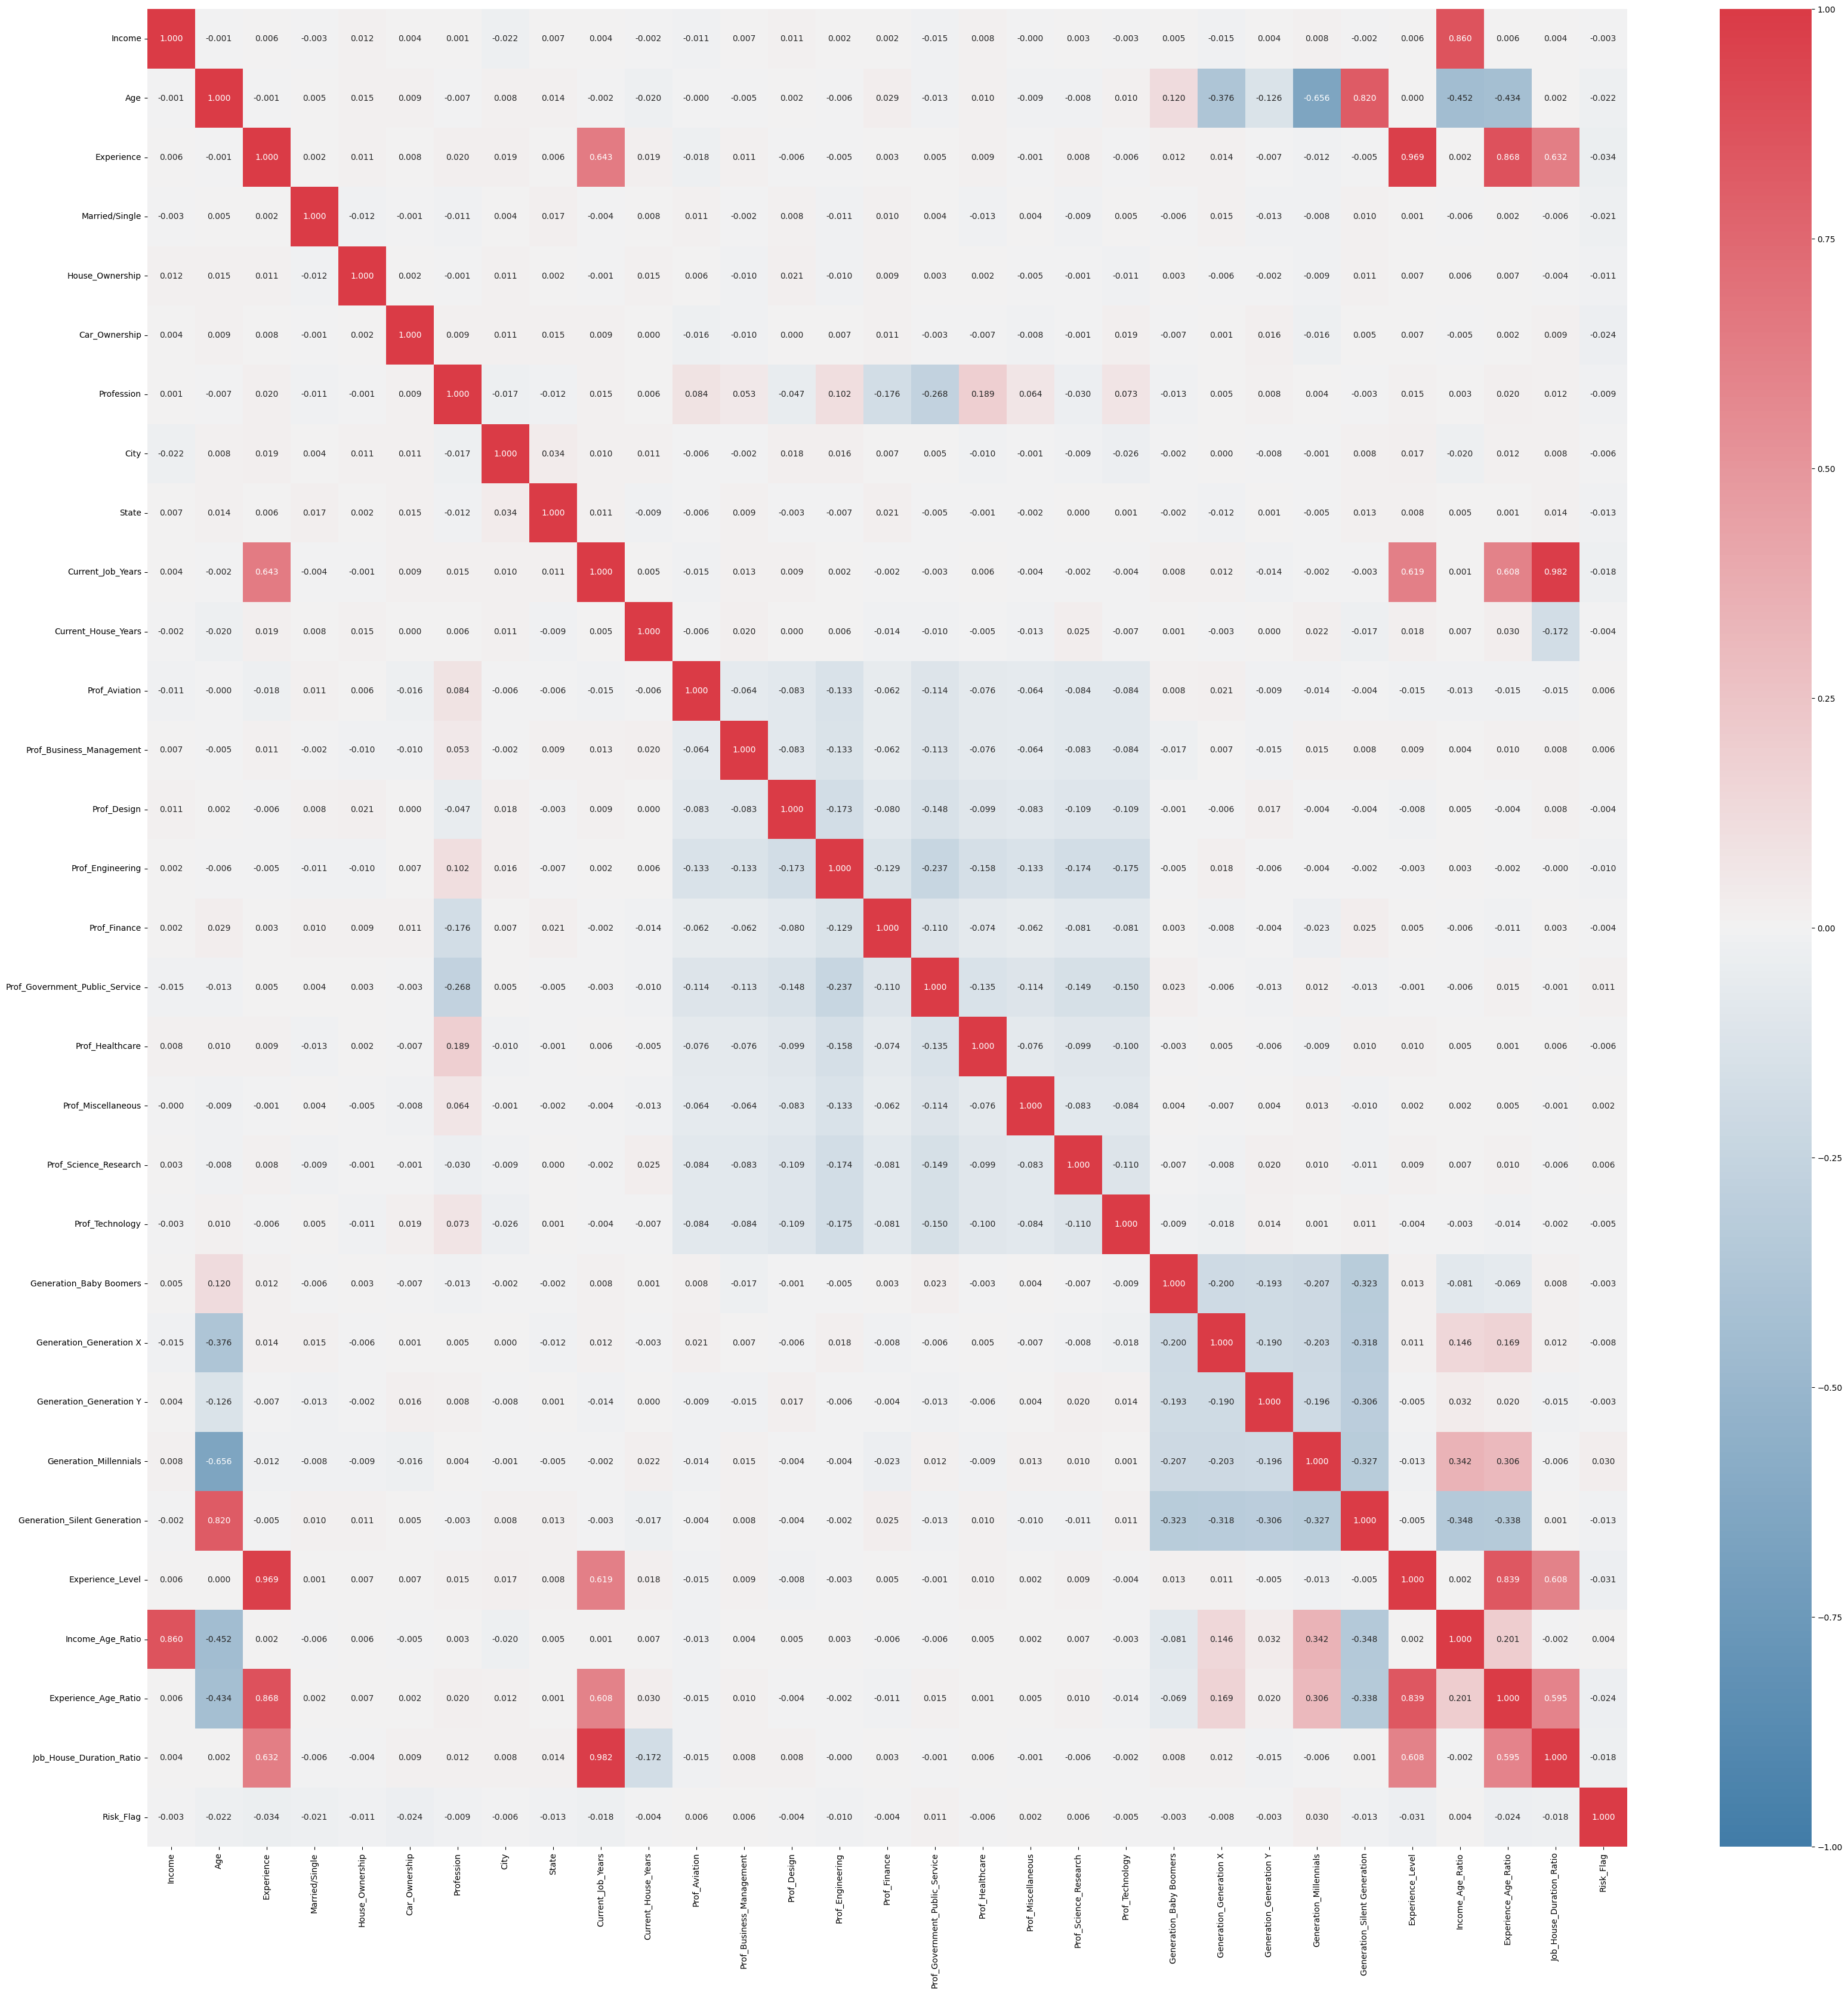

In [ ]:
# Heatmap (corr spearman)
plt.figure(figsize=(40,40))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

- Melihat hubungan antara feature-feature dan feature-target yang tidak linear pada pairplot (scatterplot matrix), maka kurang tepat dalam penggunaaan metode Pearson. Sehingga dalam melihat korelasinya jika ingin menggunakan df.corr() adalah pada hasil metode Spearman yang dapat menangkap hubungan non-linear

- Pada perhitungan korelasi dengan df.corr() ditemukan bahwa feature yang paling relevan adalah Experience (-0.034), House_Ownership (0.026), Car_Ownership (-0.024). Hasil ini akan dibandingkan dengan menggunakan SelectKBest

## Checking feature importance using SelectKBest

### Informasi Tambahan Mengenai Metode Perhitungan Relevansi Feature Menggunakan SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Prof_Aviation,Prof_Business_Management,Prof_Design,Prof_Engineering,Prof_Finance,Prof_Government_Public_Service,Prof_Healthcare,Prof_Miscellaneous,Prof_Science_Research,Prof_Technology,Generation_Baby Boomers,Generation_Generation X,Generation_Generation Y,Generation_Millennials,Generation_Silent Generation,Experience_Level,Income_Age_Ratio,Experience_Age_Ratio,Job_House_Duration_Ratio,Risk_Flag
0,1303834,23,3,0,1,0,5217,798,14122,3,13,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,56688.434783,0.130435,0.230769,0
1,7574516,40,10,0,1,0,5053,849,25562,9,13,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,189362.900000,0.250000,0.692308,0
2,3991815,66,4,1,1,0,5195,688,5805,4,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,60482.045455,0.060606,0.400000,0
3,6256451,41,2,0,1,1,5053,607,4658,2,12,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,152596.365854,0.048780,0.166667,1
4,5768871,47,11,0,1,0,4413,809,16537,3,14,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,122741.936170,0.234043,0.214286,1


In [ ]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Risk_Flag'])  # Features
y_target_test = df_feature_target_relation['Risk_Flag']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
print(feature_scores_df)

                           Feature     Score
27                Income_Age_Ratio  0.160408
0                           Income  0.159595
4                  House_Ownership  0.029798
28            Experience_Age_Ratio  0.020762
25    Generation_Silent Generation  0.015672
5                    Car_Ownership  0.011954
26                Experience_Level  0.011648
10             Current_House_Years  0.008955
7                             City  0.008326
14                Prof_Engineering  0.005790
8                            State  0.005089
24          Generation_Millennials  0.004580
16  Prof_Government_Public_Service  0.004424
21         Generation_Baby Boomers  0.004259
23         Generation_Generation Y  0.003780
22         Generation_Generation X  0.003701
2                       Experience  0.003615
9                Current_Job_Years  0.003479
29        Job_House_Duration_Ratio  0.003208
6                       Profession  0.002760
3                   Married/Single  0.002437
15        

- Dapat dilihat bahwa hasilnya menggunakan SelectKBest cukup berbeda dengan hasil perhitungan korelasi feature-target menggunakan df.corr() terutama pada metode SelectKBest yang lebih robust ketika menangkap hubungan feature-target yang tidak linear seperti mutual_info_classif.
- Pada metode tersebut ditemukan bahwa feature yang paling relevan terhadap Risk_Flag adalah Income yang sebenarnya terdengar lebih masuk akal.

In [ ]:
df_encoding.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Current_Job_Years',
       'Current_House_Years', 'Prof_Aviation', 'Prof_Business_Management',
       'Prof_Design', 'Prof_Engineering', 'Prof_Finance',
       'Prof_Government_Public_Service', 'Prof_Healthcare',
       'Prof_Miscellaneous', 'Prof_Science_Research', 'Prof_Technology',
       'Generation_Baby Boomers', 'Generation_Generation X',
       'Generation_Generation Y', 'Generation_Millennials',
       'Generation_Silent Generation', 'Experience_Level', 'Income_Age_Ratio',
       'Experience_Age_Ratio', 'Job_House_Duration_Ratio', 'Risk_Flag'],
      dtype='object')

In [ ]:
# Select only relevant features for each cases before moving to modelling process

df_model = df_encoding.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 dipilih salah satu saja)
selected_features = ['Income', 'House_Ownership', 'Car_Ownership',
                     'Current_House_Years', 'Generation_Baby Boomers', 'Generation_Generation X',
                     'Generation_Generation Y', 'Generation_Millennials', 'Generation_Silent Generation',
                     'Experience_Age_Ratio', 'Risk_Flag']

df_model = df_model[selected_features]

- Pada bagian ini feature akan dipilih berdasarkan pengaruhnya terhadap target seperti yang telah dilihat pada nilai korelasi (df.corr()) dan relevansi (SelectKBest) terhadap target diatas. Dapat berubah-ubah tergantung saat modelling mau eksperimen dengan feature apa saja.

- Beberapa feature akan di-drop karena memiliki korelasi feature-feature yang tinggi dari hasil df.corr() (karena redundant dibuang dan diambil satu saja)

### Feature Tambahan

Beberapa feature yang memiliki informasi yang relevan dan mungkin akan sangat membantu membuat performansi model semakin bagus

1. Debt amount: Jumlah total uang yang terutang oleh seseorang atau organisasi kepada pihak lain
2. Living cost: Biaya hidup dapat bervariasi tergantung pada lokasi, gaya hidup, dan kebutuhan individu
3. Credit score: Skor kredit dihitung berdasarkan berbagai faktor, seperti riwayat pembayaran pinjaman, jumlah hutang, dan lama riwayat kredit
4. Loan purpose: Tujuan pinjaman adalah alasan mengapa seseorang atau organisasi meminjam uang
5. Total asset: jumlah keseluruhan asset yang dimiliki peminjam dalam bentuk nominal uang
6. Tenor: Jangka waktu pinjaman

# Split Train and Test Data

In [ ]:
# Re-arrange the columns (Risk_Flag in last)
df_1 = df_model.drop(columns='Risk_Flag')
df_2 = df_model['Risk_Flag']
df_model = pd.concat([df_1, df_2], axis='columns')

In [ ]:
# Spliting data into train-test
x = df_model.drop(columns=['Risk_Flag'])
y = df_model[['Risk_Flag']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {x_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {x_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (176400, 10)
Dimension of y_train data : (176400, 1)
Dimension of x_test data : (75600, 10)
Dimension of y_test data : (75600, 1)


**Informasi Tambahan Tentang Split Train-Test Kasus Imbalance**

The class distribution in the training set and the test set may not necessarily reflect the original class imbalance if you use a simple train-test split, especially if the dataset is imbalanced.

When you split the data into training and testing sets, the split is often random, and there's a chance that the class distribution in the training set and test set might differ from the original dataset. If the class distribution is imbalanced, you might end up with imbalanced subsets in both the training and testing sets.

To address this concern, you can use techniques like stratified sampling during the train-test split. Stratified sampling ensures that the class distribution is preserved in both the training and testing sets, maintaining the original imbalance. This is particularly important when dealing with imbalanced datasets because it helps ensure that the model learns and generalizes well on both classes.

Here's an example using scikit-learn in Python:

```python
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
```

In this example, the `stratify=y` argument ensures that the class distribution in the target variable `y` is preserved when splitting the data into training and testing sets. Adjust the `test_size` parameter based on your preference for the split ratio.

In [ ]:
# Checking imbalance before train-test split
value_counts = y.value_counts()
percentage_values = (value_counts / len(y)) * 100
print(percentage_values)

Risk_Flag
0            87.7
1            12.3
dtype: float64


In [ ]:
# Checking imbalance after train-test split
value_counts = y_train.value_counts()
percentage_values = (value_counts / len(y_train)) * 100
print(percentage_values)

Risk_Flag
0            87.700113
1            12.299887
dtype: float64


# Feature Scaling

In [ ]:
len(x_train.columns)

10

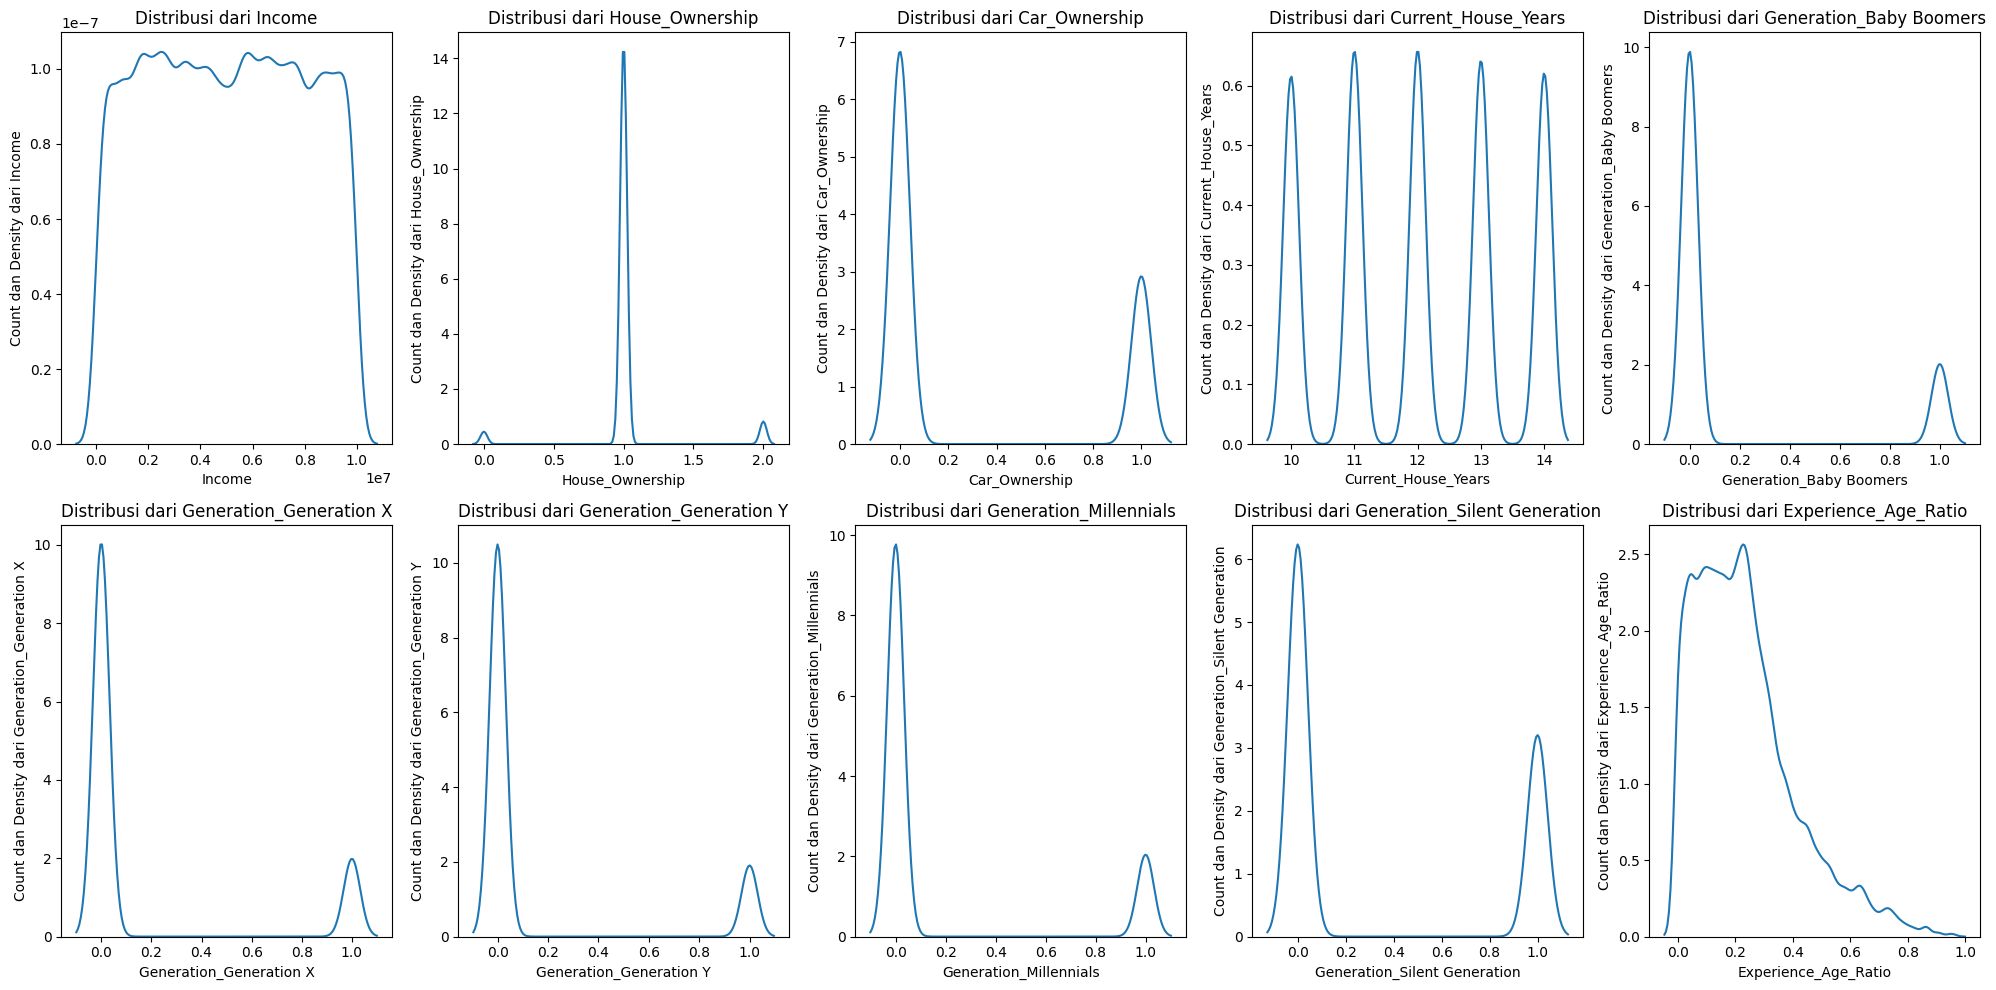

In [ ]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(data = x_train, ax=axes[i], x=x_train.columns[i])
  axes[i].set_title(f'Distribusi dari {x_train.columns[i]}')
  axes[i].set_ylabel(f'Count dan Density dari {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

In [ ]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['Income', 'Current_House_Years'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ms.fit_transform(x_train[[n]])
  x_test[n] = ms.fit_transform(x_test[[n]])

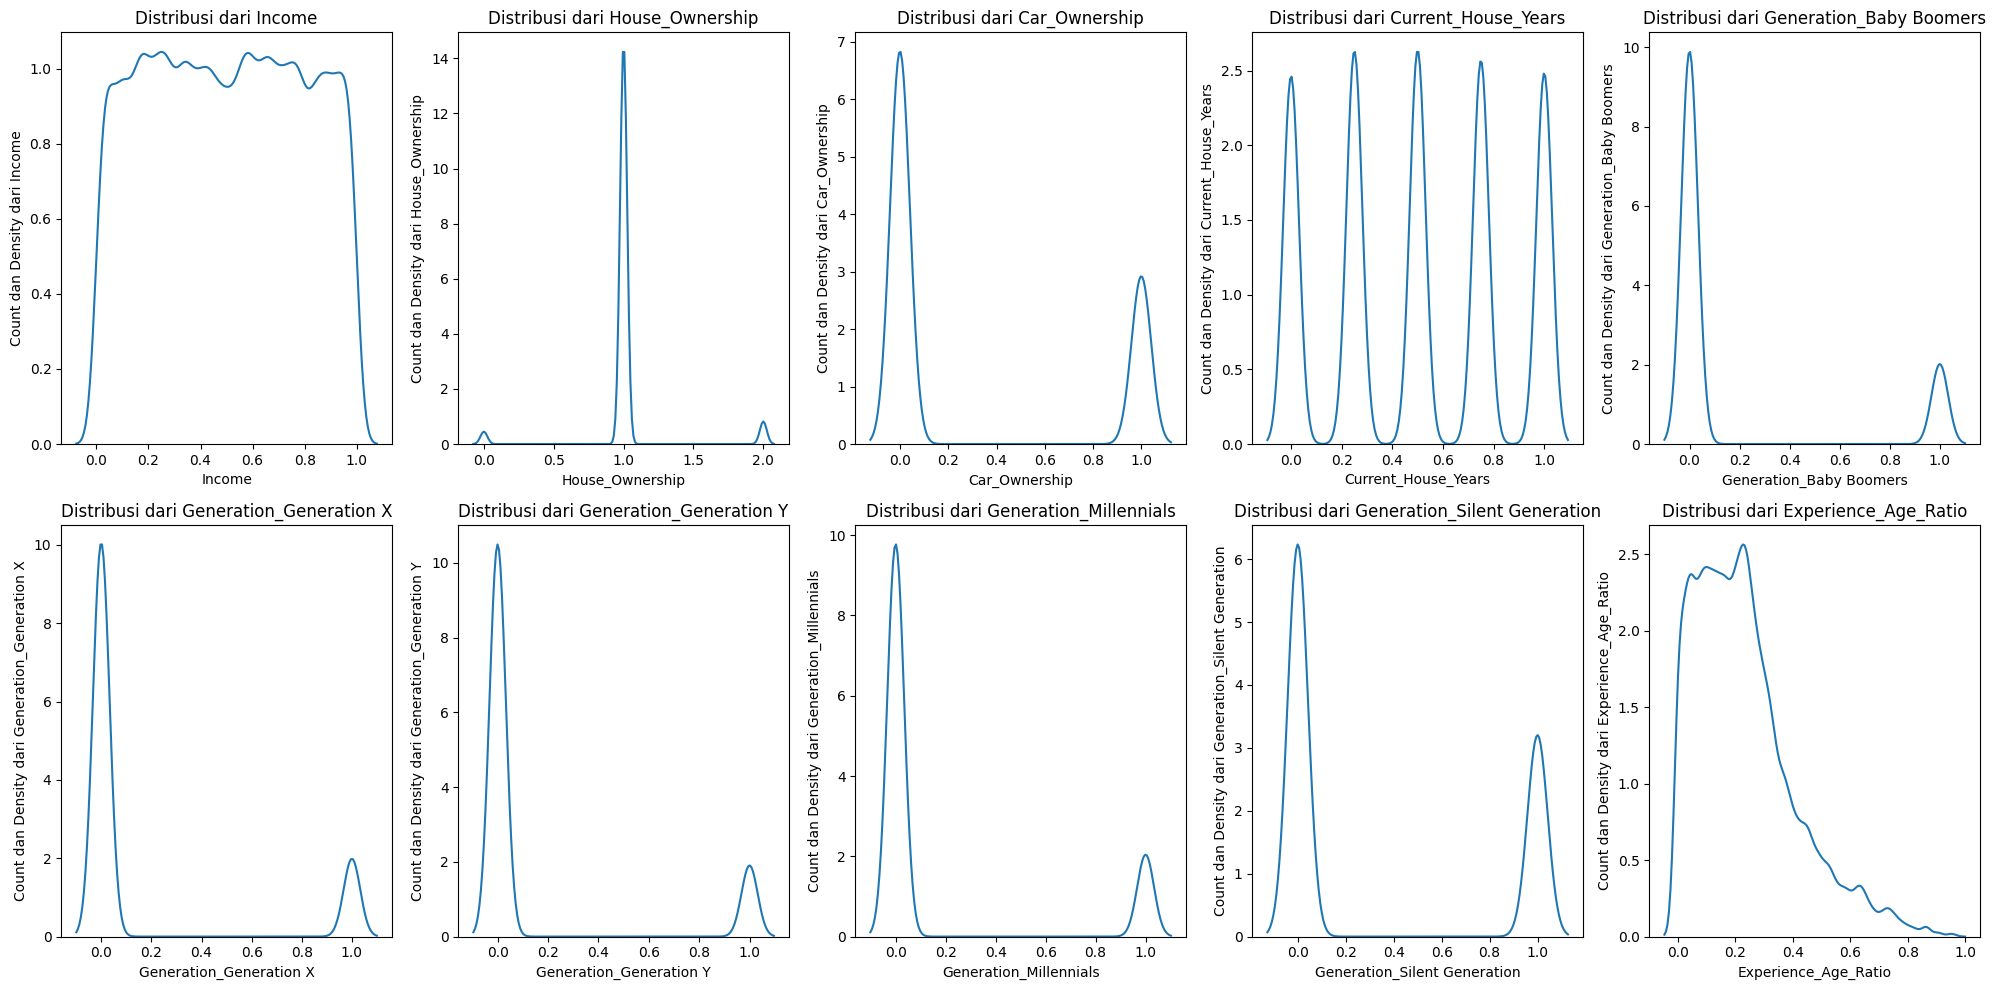

In [ ]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(data = x_train, ax=axes[i], x=x_train.columns[i])
  axes[i].set_title(f'Distribusi dari {x_train.columns[i]}')
  axes[i].set_ylabel(f'Count dan Density dari {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

# Handling Class Imbalance

In [ ]:
#Initiate dataframe before sampling
x_imbalance = x_train.copy()
y_imbalance = y_train.copy()

In [ ]:
#Target values before sampling
value_counts = y_imbalance.iloc[:, 0].value_counts()
print(value_counts)

0    154703
1     21697
Name: Risk_Flag, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before sampling:")
print("x_imbalance shape:", x_imbalance.shape)
print("y_imbalance shape:", y_imbalance.shape)

# SMOTE
smote = SMOTE(sampling_strategy=0.5)
x_train_smote, y_train_smote = smote.fit_resample(x_imbalance, y_imbalance)

print("After SMOTE:")
print("x_train_SMOTE shape:", x_train_smote.shape)
print("y_train_SMOTE shape:", y_train_smote.shape)

Before sampling:
x_imbalance shape: (176400, 10)
y_imbalance shape: (176400, 1)
After SMOTE:
x_train_SMOTE shape: (232054, 10)
y_train_SMOTE shape: (232054, 1)


In [ ]:
#Target values after sampling
value_counts = y_train_smote.iloc[:, 0].value_counts()
print(value_counts)

0    154703
1     77351
Name: Risk_Flag, dtype: int64


In [ ]:
#Initialize sampled train set for modeling process
x_train_sampled = x_train_smote.copy()
y_train_sampled = y_train_smote.copy()

Reminder class imbalance

- Undersampling : yang banyak mengikuti yang sedikit
- Oversampling : yang sedikit mengikuti yang banyak

# STAGE 3

# Modelling

## Train Classification Models

Initial train using default hyperparameter

In [ ]:
# logictic regression
from sklearn.linear_model import LogisticRegression # import logistic regression from sklearn
lg = LogisticRegression() # initiation object called lg
lg.fit(x_train_sampled, y_train_sampled) # fit logistic regression model in train data

LogisticRegression()

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn from sklearn
knn = KNeighborsClassifier() # initiation object called knn
knn.fit(x_train_sampled, y_train_sampled) # fit knn model in train data

KNeighborsClassifier()

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree from sklearn
dt = DecisionTreeClassifier() # initiation object called dt
dt.fit(x_train_sampled, y_train_sampled) # fit decision tree model in train data

DecisionTreeClassifier()

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier # import random forest from sklearn
rf = RandomForestClassifier(random_state=42) # initiation object called rf
rf.fit(x_train_sampled, y_train_sampled) # fit random forest model in train data

RandomForestClassifier(random_state=42)

In [ ]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier # import ADB from sklearn
ab = AdaBoostClassifier() # initiation object called ab
ab.fit(x_train_sampled, y_train_sampled) # fit ADB model in train data

AdaBoostClassifier()

In [ ]:
# xgboost
from xgboost import XGBClassifier # import XGB from sklearn
xg = XGBClassifier() # initiation object called xg
xg.fit(x_train_sampled, y_train_sampled) # fit XGB model in train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluate Classification Models

In [ ]:
#Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_sampled)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_sampled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (Train-Proba): %.2f" % roc_auc_score(y_train_sampled, y_pred_proba_train[:, 1]))
    print("roc_auc (Test-Proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    #Cross Validation
    score = cross_validate(model, x_train_sampled, y_train_sampled, cv=5, scoring='recall', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))

    # Print standard deviation of recall scores
    print('Recall Std Dev (crossval train): ' + str(score['train_score'].std()))
    print('Recall Std Dev (crossval test): ' + str(score['test_score'].std()))

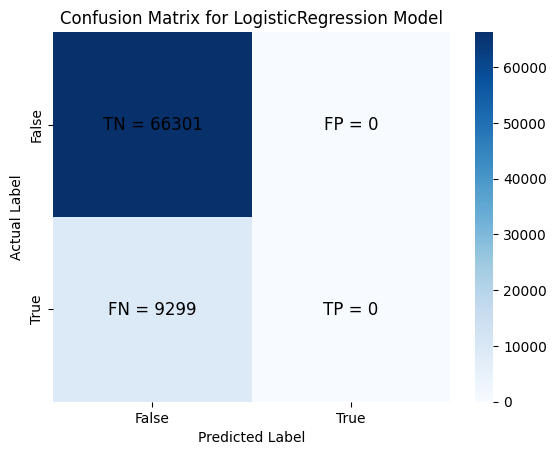

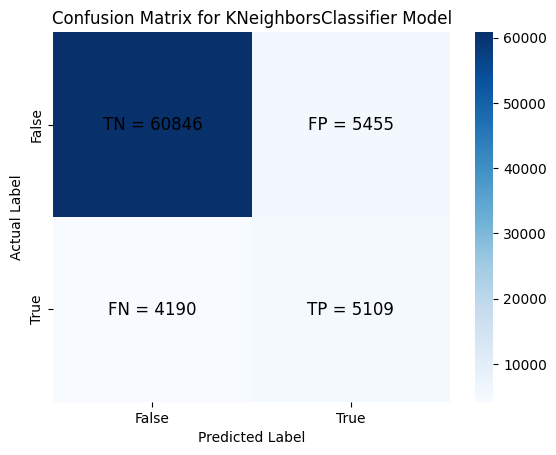

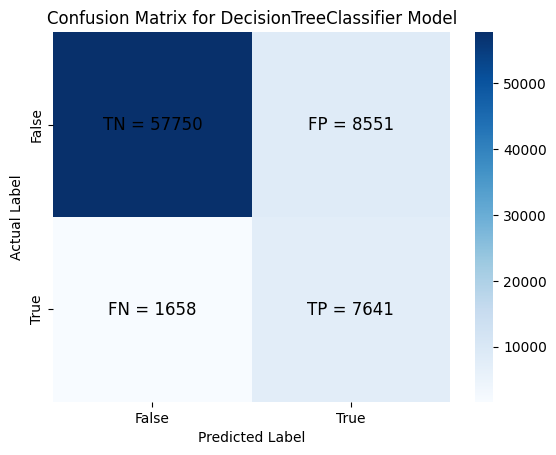

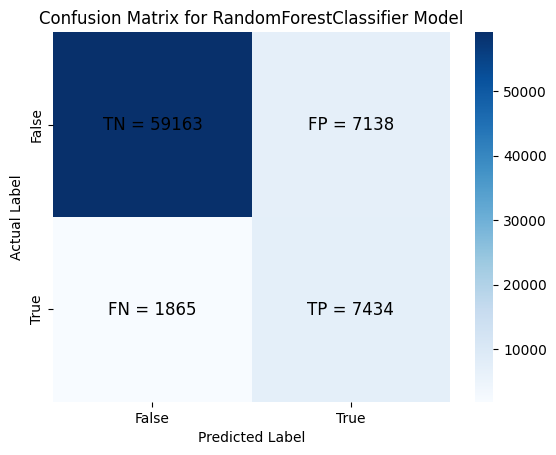

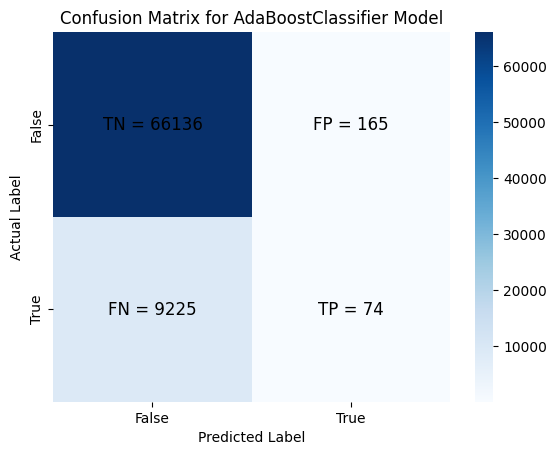

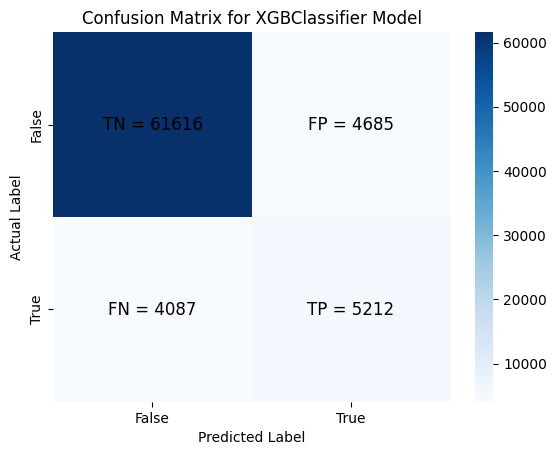

In [ ]:
#Confusion matrix of all models
from sklearn.metrics import confusion_matrix

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

for model in models :

    model.fit(x_train_sampled, y_train_sampled)

    y_pred = model.predict(x_test)

    #Make confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    #Plot the confusion matrix in heatmap
    sns.heatmap(conf_mat, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix for {type(model).__name__} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

**Informasi Tambahan Tentang confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

In [ ]:
#Printing metrics in form of classification report
from sklearn.metrics import classification_report

def display_classification_reports(model_for_report):
    model_for_report.fit(x_train_sampled, y_train_sampled)
    y_pred = model_for_report.predict(x_test)
    print("Classification Report for", type(model_for_report).__name__)
    print(classification_report(y_test, y_pred))

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Evaluate and print classification reports for all models
for model in models:
    display_classification_reports(model)

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66301
           1       0.48      0.55      0.51      9299

    accuracy                           0.87     75600
   macro avg       0.71      0.73      0.72     75600
weighted avg       0.88      0.87      0.88     75600

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     66301
           1       0.47      0.82      0.60      9299

    accuracy                           0.

**Informasi Tambahan Tentang Classification_Report**

1. `from sklearn.metrics import classification_report`: This line imports the `classification_report` function from scikit-learn's `metrics` module. This function is used to generate a text report that includes precision, recall, f1-score, and support for each class.

2. `print(classification_report(y_test, y_pred))`: This line prints the classification report based on the true labels (`y_test`) and the predicted labels (`y_pred`). `y_test` typically represents the actual class labels in your test set, and `y_pred` represents the predicted labels generated by your machine learning model.

Now, regarding the interpretation of the classification report:
- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 and class 1, precision will be separately calculated.
- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is also calculated separately for class 0 and class 1.
- F1-score: The F1-score is the weighted average of precision and recall. It is a good way to show a balance between precision and recall.
- Support: Support is the number of actual occurrences of the class in the specified dataset.

The classification report will include these metrics for each class in your classification problem. The classes are typically denoted as 0 and 1 in binary classification problems. Class 0 usually represents the negative class (e.g., non-event or absence of a condition), and Class 1 represents the positive class (e.g., event or presence of a condition).

In the report, you will see values for precision, recall, f1-score, and support for both Class 0 and Class 1. The interpretation of these metrics depends on the context of your specific classification problem. Generally, you would want high values for precision, recall, and f1-score, indicating good performance of your model.

In [ ]:
#Printing metrics score for all models to compare

#Logistic Regression
print('Evaluate LogisticRegression')
eval_classification(lg)

#K-Neareest Neighbors Classifier
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)

#Decision Tree Classifier
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

#Random Forest Classifier
print('\nEvaluate RandomForestClassifier')
eval_classification(rf)

#AdaBoost Classifier
print('\nEvaluate AdaBoostClassifier')
eval_classification(ab)

#XGBoost Classifier
print('\nEvaluate XGBoostClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy (Test Set): 0.88
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (Train-Proba): 0.54
roc_auc (Test-Proba): 0.54
Recall (crossval train): 0.0
Recall (crossval test): 0.0
Recall Std Dev (crossval train): 0.0
Recall Std Dev (crossval test): 0.0

Evaluate KNeighborsClassifier
Accuracy (Test Set): 0.87
Precision (Test Set): 0.48
Recall (Test Set): 0.55
F1-Score (Test Set): 0.51
roc_auc (Train-Proba): 0.94
roc_auc (Test-Proba): 0.87
Recall (crossval train): 0.5985413199555287
Recall (crossval test): 0.572221606770421
Recall Std Dev (crossval train): 0.19701221677848646
Recall Std Dev (crossval test): 0.20031176909727613

Evaluate DecisionTreeClassifier
Accuracy (Test Set): 0.86
Precision (Test Set): 0.47
Recall (Test Set): 0.82
F1-Score (Test Set): 0.60
roc_auc (Train-Proba): 0.98
roc_auc (Test-Proba): 0.84
Recall (crossval train): 0.9962282306928387
Recall (crossval test): 0.9062971624412954
Recall Std Dev (crossval t

Perlu diingat bahwa di dataset ini 0 berarti tidak default (tidak gagal bayar) dan 1 default kan, berarti

- False Positive : actualnya tidak default tp diprediksi default
- False Negative : actualnya default tp diprediksi tidak default

**Dalam hal ini kita ingin meminimalisir False Negative sekecil mungkin, sehingga metric utama yang dievaluasi adalah recall (walaupun setiap metric tetap ditampilkan)**

# Summary Dari Model-Model Yang Telah Dihasilkan Berbagai Macam Algoritma ML

Telah dilakukan percobaan terhadap model-model (default hyperparameter) dibawah ini :

1. Logistic Regression
2. K-Nearest Neighbor Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient Boosting (AdaBoost and XGBoost)

Dari keseluruhan tersebut diperoleh hasil yang terbaik dimiliki oleh :

  - <b>Decision Tree Classifier</b>
  - <b>Random Forest Classifier</b>
  - <b>XGBoost Classifier</b>

Sehingga ketiga model yang dihasilkan dari algoritma berbasis Tree tersebut dapat dilakukan hyperparameter tuning untuk sedikit memperbaiki hasilnya (untuk model lainnya juga yang memiliki performa cukup baik, jika ada waktu dan resource lainnya akan dilakukan eksperimen).

**Namun untuk saat ini, sesuai dengan arahan dan keterangan dari mentor, dipilih 1 model terbaik saja untuk dilihat feature importance score dan dilakukan hyperparameter tuning dengan GridSearch, dan hasil terbaik (recall) dimiliki oleh Random Forest**.

Satu hal yang perlu menjadi pertimbangan juga adalah bahwa faktor kondisi aktual (data test) yang imbalanced juga perlu diperhitungkan, sehingga melihat performa ROC-AUC mungkin dapat menjadi hal penting. Hal ini dilakukan karena melihat performa recall pada random forest dan decision tree mungkin berdekatan namun pada metric yang menangkap kondisi imbalanced seperti ROC-AUC cukup berbeda.

## Feature Importances from Classification Models

In [ ]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

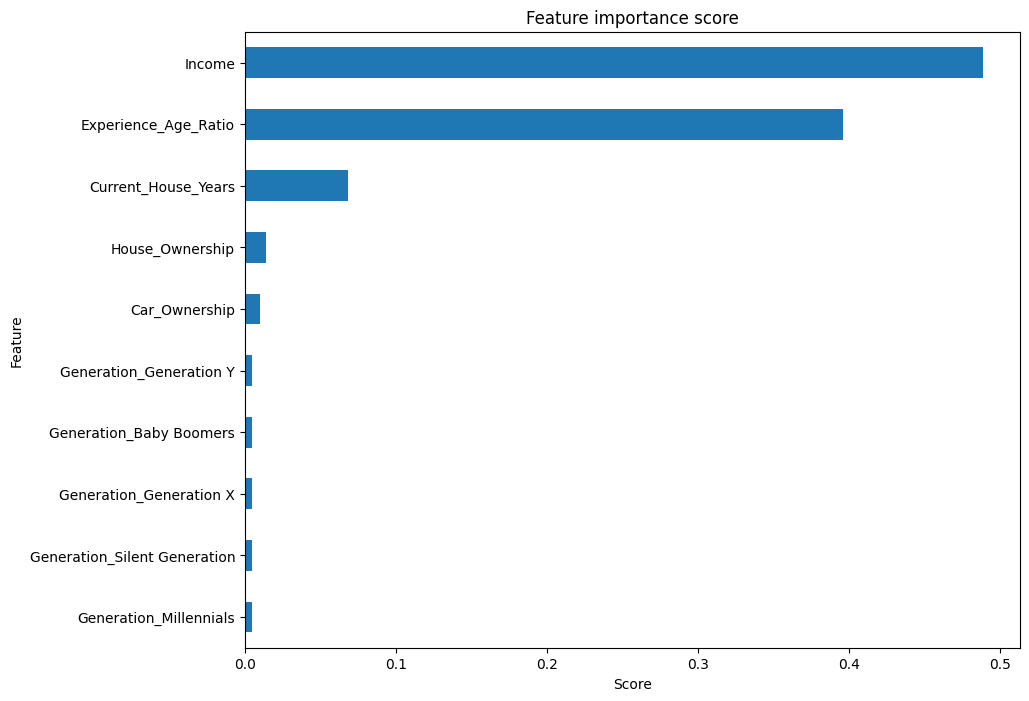

In [ ]:
# Feature importance in random forest
show_feature_importance(rf)

Pada model yang dihasilkan menggunakan algoritma decision tree, 3 feature yang berkontribusi paling banyak terhadap hasil prediksi adalah Income, Experience_Age_Ratio, dan Current_House_Years.

## Hyperparameter Tuning

In [ ]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest

Param value: 1; train: 0.9613191813939057; test: 0.8198731046349069; difference: 0.14144607675899878
Param value: 6; train: 0.9796253442101589; test: 0.7942789547263147; difference: 0.1853463894838442
Param value: 12; train: 0.9901746583754574; test: 0.7970749542961609; difference: 0.19309970407929644
Param value: 18; train: 0.993833305322491; test: 0.7976126465211313; difference: 0.19622065880135975
Param value: 24; train: 0.9947511990795206; test: 0.7996558769760189; difference: 0.19509532210350167
Param value: 30; train: 0.9951261134309834; test: 0.7977201849661254; difference: 0.19740592846485805
Param value: 36; train: 0.9960310791069281; test: 0.7976126465211313; difference: 0.19841843258579683
Param value: 41; train: 0.9959017982960789; test: 0.8036347994408001; difference: 0.19226699885527887
Param value: 47; train: 0.9959405825393337; test: 0.8021292612108829; difference: 0.1938113213284508
Param value: 53; train: 0.9965223461881553; test: 0.8012689536509302; difference: 0.195

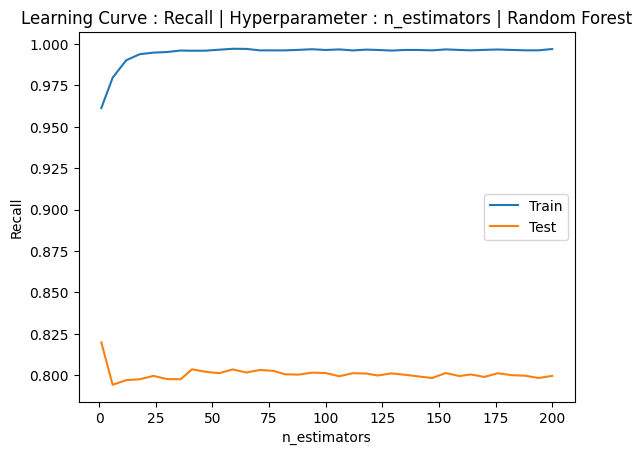

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9460135390536913; test: 0.8510167174360769; difference: 0.09499682161761447
Param value: 6; train: 0.9722243844814746; test: 0.9120583633188467; difference: 0.060166021162627925
Param value: 12; train: 0.9728559056948144; test: 0.9234103785578556; difference: 0.04944552713695882
Param value: 18; train: 0.973032074626666; test: 0.9268801068667534; difference: 0.04615196775991259
Param value: 24; train: 0.9731529528491685; test: 0.929443134316319; difference: 0.0437098185328495
Param value: 30; train: 0.9730762387944737; test: 0.9322476216719098; difference: 0.040828617122563915
Param value: 36; train: 0.9731228503919417; test: 0.9329313790712441; difference: 0.04019147132069756
Param value: 41; train: 0.9731466042565747; test: 0.9326881057991836; difference: 0.040458498457391134
Param value: 47; train: 0.9732029578558699; test: 0.9337988298011604; difference: 0.0394041280547095
Param value: 53; train: 0.9732128608497149; test: 0.9342316022568647; difference: 0.0

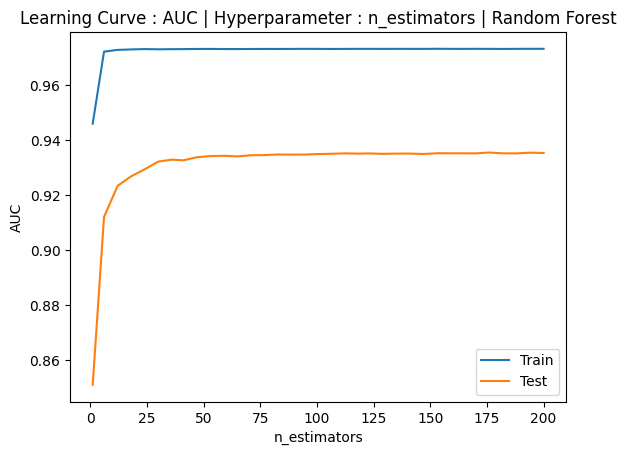

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.0; test: 0.0; difference: 0.0
Param value: 8; train: 0.056340577368101254; test: 0.047854608022367996; difference: 0.008485969345733257
Param value: 15; train: 0.522359116236377; test: 0.4351005484460695; difference: 0.0872585677903075
Param value: 22; train: 0.9459089087406756; test: 0.7659963436928702; difference: 0.1799125650478054
Param value: 29; train: 0.9948029114038603; test: 0.7978277234111195; difference: 0.19697518799274083
Param value: 36; train: 0.9961603599177774; test: 0.7981503387461018; difference: 0.19801002117167565
Param value: 43; train: 0.9963413530529663; test: 0.7998709538660072; difference: 0.1964703991869592
Param value: 50; train: 0.9953329627283423; test: 0.8004086460909775; difference: 0.19492431663736476
Param value: 57; train: 0.9961345037556075; test: 0.8015915689859124; difference: 0.1945429347696951
Param value: 64; train: 0.9963672092151362; test: 0.7995483385310248; difference: 0.1968188706841114
Param value: 71; train: 0.996

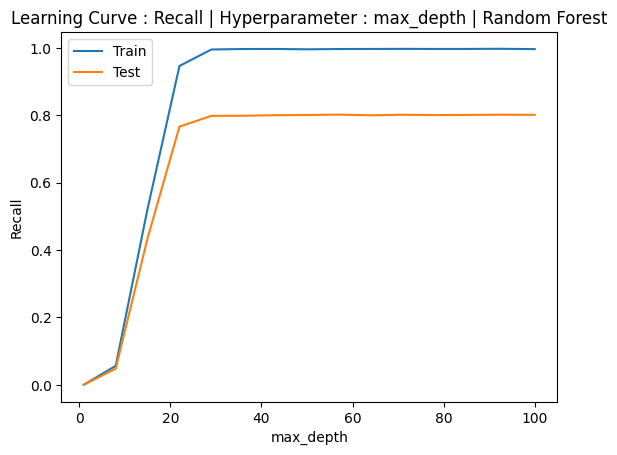

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.5482032087681769; test: 0.5443341516907192; difference: 0.0038690570774576605
Param value: 8; train: 0.7269262776114711; test: 0.6943335274743339; difference: 0.03259275013713725
Param value: 15; train: 0.9402560139265603; test: 0.8832686902132874; difference: 0.056987323713272975
Param value: 22; train: 0.9659101008203443; test: 0.9235584460581323; difference: 0.04235165476221203
Param value: 29; train: 0.9717769226891442; test: 0.9331959569612591; difference: 0.03858096572788505
Param value: 36; train: 0.9730837708225553; test: 0.9349517007766845; difference: 0.038132070045870714
Param value: 43; train: 0.9732042601237738; test: 0.9350180046080551; difference: 0.03818625551571875
Param value: 50; train: 0.9731630159157938; test: 0.9350468595112458; difference: 0.03811615640454802
Param value: 57; train: 0.9732157409898196; test: 0.9349246016594808; difference: 0.038291139330338786
Param value: 64; train: 0.973198182789987; test: 0.9348636016804674; difference

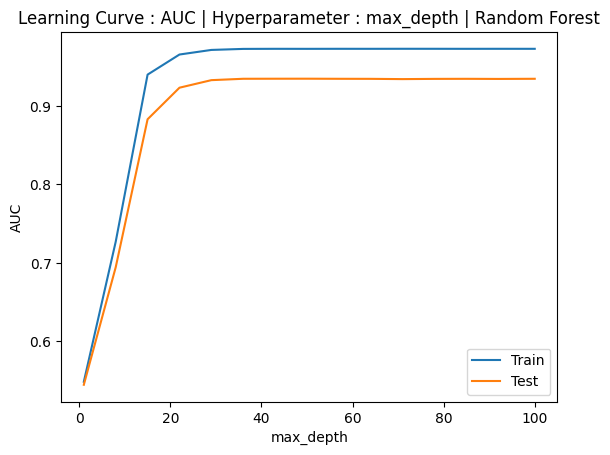

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9961086475934378; test: 0.8008387998709539; difference: 0.1952698477224839
Param value: 5; train: 0.9917518842678181; test: 0.7978277234111195; difference: 0.1939241608566986
Param value: 10; train: 0.9869297100231412; test: 0.7992257231960426; difference: 0.18770398682709866
Param value: 50; train: 0.8722964150431152; test: 0.7668566512528229; difference: 0.1054397637902923


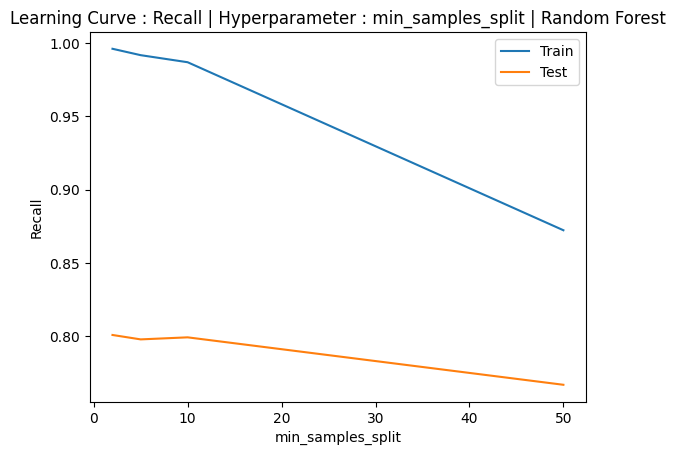

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9732158646691277; test: 0.9348896967962618; difference: 0.03832616787286591
Param value: 5; train: 0.9695708466386638; test: 0.935950773820624; difference: 0.0336200728180398
Param value: 10; train: 0.9671480423225206; test: 0.936485332393376; difference: 0.03066270992914466
Param value: 50; train: 0.9584538252703977; test: 0.9309186838837803; difference: 0.02753514138661739


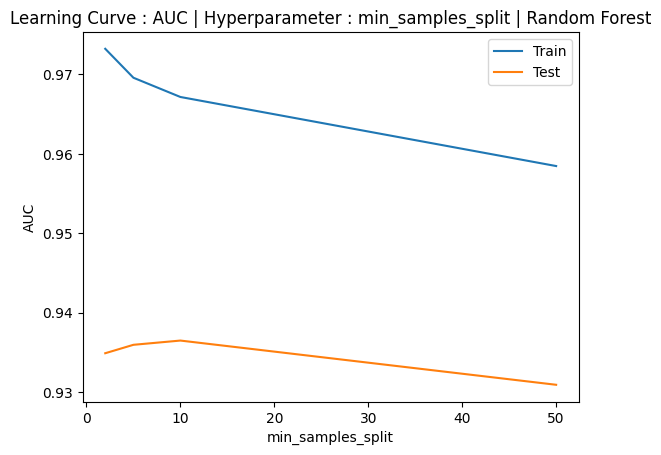

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9966128427557498; test: 0.8012689536509302; difference: 0.1953438891048196
Param value: 2; train: 0.9707566805859006; test: 0.7918055704914507; difference: 0.17895111009444986
Param value: 5; train: 0.901785367997828; test: 0.7762124959673083; difference: 0.1255728720305197
Param value: 10; train: 0.8475779240087394; test: 0.7662114205828584; difference: 0.08136650342588103
Param value: 30; train: 0.7878631174774728; test: 0.7281428110549522; difference: 0.059720306422520686


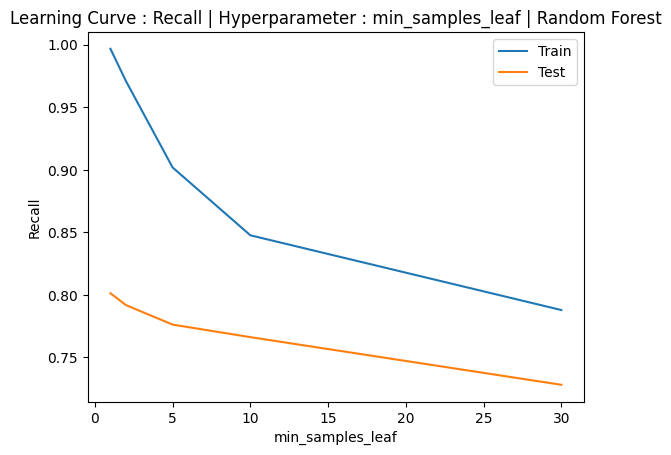

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9732058732195069; test: 0.9350407033119732; difference: 0.038165169907533714
Param value: 2; train: 0.9666013393758918; test: 0.9354132940741424; difference: 0.031188045301749345
Param value: 5; train: 0.958483607749198; test: 0.9317362735356198; difference: 0.026747334213578222
Param value: 10; train: 0.9539755234586178; test: 0.9252779671571156; difference: 0.02869755630150217
Param value: 30; train: 0.940932486175522; test: 0.9044262698094446; difference: 0.036506216366077426


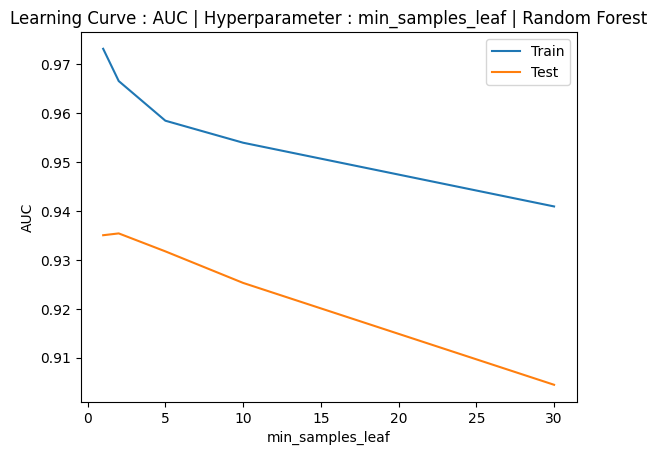

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Final Hyperparameter used are chosen based on learning curve, iteration of showing best hyperparameters, and some other references

In [ ]:
#Hyperparameter tuning for random forest

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
# rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.80
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.93
Recall (crossval train): 0.9953523524262904
Recall (crossval test): 0.9142090757037888
Recall Std Dev (crossval train): 0.0006272806082709854
Recall Std Dev (crossval test): 0.020376278985212482


In [ ]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

- Before Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.80
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.93
  - Recall (crossval train): 0.9963672085255446
  - **Recall (crossval test): 0.9144675997216805**
  - Recall Std Dev (crossval train): 0.0006258301768439622
  - Recall Std Dev (crossval test): 0.021597573175740212

- After Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.80
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.93
  - Recall (crossval train): 0.9953523524262904
  - **Recall (crossval test): 0.9142090757037888**
  - Recall Std Dev (crossval train): 0.0006272806082709854
  - Recall Std Dev (crossval test): 0.020376278985212482

Dapat dilihat bahwa belum ada peningkatan pada Recall setelah dilakukan hyperparameter tuning, sehingga menggunakan default hyperparameter pun sebenarnya sudah mendapatkan hasil yang baik. Mungkin dapat terjadi peningkatan walaupun hanya sedikit sekali jika dilakukan dengan range hyperparameter yang lebih luas namun resource komputasi yang diperlukan untuk melakukan hal tersebut belum memungkinkan saat ini.

# Business Impact Simulation

Dengan menggunakan model random forest untuk memprediksi costumer/nasabah mana yang akan default maka kita dapat mengurangi persentase default yang awalnya **12.30 %** menjadi :

**Default Rate** = TN / Jumlah keseluruhan Data = 1865/(59163+7138+1865+7434) * 100 = **2,46 %**

# Test Prediction Quality

 ['Income', 'Married/Single', 'House_Ownership',
                     'Experience_Age_Ratio', 'Generation_Baby Boomers', 'Generation_Generation X',
                     'Generation_Generation Y', 'Generation_Millennials', 'Generation_Silent Generation',
                     'Car_Ownership', 'Current_House_Years', 'Risk_Flag']

In [ ]:
# Normalization for Data Training
columns_to_scale = ['Income', 'Current_House_Years'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)

scale_features = x[columns_to_scale]
for n in scale_features:
  x[n] = ms.fit_transform(x[[n]])

In [ ]:
# Call Data Testing
data_test = pd.read_csv('/content/drive/MyDrive/Google Drive/Test Data.csv')
data_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
# Preprocessing
# Label encoding for Married/Single, House_Ownership, Car_Ownership
data_test.replace({'Married/Single':{'single':0,'married':1},
                     'House_Ownership':{'norent_noown':0,'rented':1, 'owned' : 2},
                     'Car_Ownership':{'no':0,'yes':1}},
                      inplace=True)

for feature in cats_few :
  data_test[feature] = data_test[feature].astype('int64')

data_test['Experience_Age_Ratio'] = data_test['Experience'] / data_test['Age']

# Rename beberapa columns
data_test.rename(columns={'CURRENT_JOB_YRS' : 'Current_Job_Years'}, inplace=True)
data_test.rename(columns={'CURRENT_HOUSE_YRS' : 'Current_House_Years'}, inplace=True)
data_test.rename(columns={'CITY' : 'City'}, inplace=True)
data_test.rename(columns={'STATE' : 'State'}, inplace=True)

# Drop Id column
data_test.drop(columns='ID', inplace=True)

# Menambahkan kolom 'Generation' ke DataFrame
data_test['Generation'] = data_test['Age'].apply(assign_generation)
# One-hot Encoding for Generation
onehots = pd.get_dummies(data_test['Generation'], prefix='Generation')
onehots = onehots.astype(int)
data_test = data_test.join(onehots, lsuffix='_left', rsuffix='_right')

# Drop the original column after one-hot encoding
data_test = data_test.drop(columns='Generation')

# Select only relevant features for each cases before moving to modelling process
x_test = data_test.copy()

selected_features = ['Income', 'Married/Single', 'House_Ownership',
                     'Experience_Age_Ratio', 'Generation_Baby Boomers', 'Generation_Generation X',
                     'Generation_Generation Y', 'Generation_Millennials', 'Generation_Silent Generation',
                     'Car_Ownership', 'Current_House_Years']


x_test = x_test[selected_features]

#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['Income', 'Experience_Age_Ratio', 'Current_House_Years'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)

scale_features = x[columns_to_scale]
for n in scale_features:
  x[n] = ms.fit_transform(x[[n]])
  x_test[n] = ms.fit_transform(x_test[[n]])

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy=0.5)

# Melakukan oversampling dengan SMOTE
x_over, y_over = smote.fit_resample(x, y)

print("After RandomUnderSampler:")
print("x_train_over shape:", x_over.shape)
print("y_train_over shape:", y_over.shape)

After RandomUnderSampler:
x_train_over shape: (331506, 10)
y_train_over shape: (331506, 1)


In [ ]:
# Inisialisasi model Random Forest dengan hyperparameter yang telah ditentukan
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=45,
                                  min_samples_split=11,
                                  min_samples_leaf=2,
                                  max_depth=56,
                                  criterion='entropy')

# Melatih model pada data yang telah di-oversampling
rf_model.fit(x_over, y_over)

RandomForestClassifier(criterion='entropy', max_depth=56, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=45)

In [ ]:
from sklearn.metrics import classification_report

# Prediction
y_pred = rf_model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

real_output = pd.read_csv('/content/drive/MyDrive/Google Drive/Sample Prediction Dataset.xls')['risk_flag']
real_output = pd.DataFrame(real_output)

# Evaluation
classification_report(real_output,y_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Married/Single


In [ ]:
x_test

,Income,Married/Single,House_Ownership,Experience_Age_Ratio,Generation_Baby Boomers,Generation_Generation X,Generation_Generation Y,Generation_Millennials,Generation_Silent Generation,Car_Ownership,Current_House_Years
0,0.739054,0,1,0.338136,1,0,0,0,0,0,0.75
1,0.120596,0,1,0.210000,0,0,0,1,0,0,0.00
2,0.890037,0,1,0.252000,1,0,0,0,0,0,1.00
3,0.193614,1,1,0.192857,0,0,1,0,0,1,0.50
4,0.000312,0,1,0.756000,0,0,0,1,0,1,0.25
...,...,...,...,...,...,...,...,...,...,...,...
27995,0.995562,0,1,0.239474,1,0,0,0,0,0,0.00
27996,0.291051,0,1,0.201064,0,0,1,0,0,0,1.00
27997,0.808059,0,1,0.218750,0,0,0,1,0,0,0.75
27998,0.947381,0,1,0.267647,1,0,0,0,0,1,1.00


In [ ]:
x_over

,Income,House_Ownership,Car_Ownership,Current_House_Years,Generation_Baby Boomers,Generation_Generation X,Generation_Generation Y,Generation_Millennials,Generation_Silent Generation,Experience_Age_Ratio
0,0.129487,1,0,0.75,0,0,0,1,0,0.136957
1,0.757206,1,0,0.75,0,1,0,0,0,0.262500
2,0.398564,1,0,0.00,0,0,0,0,1,0.063636
3,0.625263,1,1,0.50,0,0,1,0,0,0.051220
4,0.576454,1,0,1.00,0,0,1,0,0,0.245745
...,...,...,...,...,...,...,...,...,...,...
331501,0.294288,1,0,0.00,0,1,0,0,0,0.430713
331502,0.752801,1,0,0.50,0,0,0,0,1,0.193846
331503,0.513829,1,0,0.25,1,0,0,0,0,0.079245
331504,0.567909,1,0,1.00,0,0,0,0,1,0.321774


In [ ]:
x

,Income,House_Ownership,Car_Ownership,Current_House_Years,Generation_Baby Boomers,Generation_Generation X,Generation_Generation Y,Generation_Millennials,Generation_Silent Generation,Experience_Age_Ratio
0,0.129487,1,0,0.75,0,0,0,1,0,0.136957
1,0.757206,1,0,0.75,0,1,0,0,0,0.262500
2,0.398564,1,0,0.00,0,0,0,0,1,0.063636
3,0.625263,1,1,0.50,0,0,1,0,0,0.051220
4,0.576454,1,0,1.00,0,0,1,0,0,0.245745
...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,1,0,0.25,0,0,1,0,0,0.317442
251996,0.283620,1,0,0.25,0,0,0,1,0,0.403846
251997,0.451682,1,0,0.50,0,0,1,0,0,0.159783
251998,0.650356,1,0,0.00,0,0,1,0,0,0.000000
